In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from util import *
from sklearn.metrics import auc
from threading import Thread

species = {
    "Pseudomonas aeruginosa",
    "Escherichia coli",
    "Salmonella enterica",
    "Staphylococcus aureus",
    "Limosilactobacillus fermentum",
    "Enterococcus faecalis",
    "Listeria monocytogenes",
    "Bacillus subtilis",
    "Saccharomyces cerevisiae",
    "Cryptococcus neoformans"}

total = 1_160_526

In [2]:
tree = Tree("F:/Studium/Master/semester5/thesis/data/NCBI/taxdmp/tree_nr.txt")
true_taxons = get_true_taxons_for_all_ranks(tree, species)
df = read_per_taxon_assignment("F:/Studium/Master/semester5/thesis/data/test_dataset/assignment_nr_uniform11s_13-mer/per_taxon_assignments.tsv")
df

,node id,rank,kmers in database,kmer count,kmer count cumulative,OVO (0.10) read count,OVO (0.10) read count cumulative,OVO (0.10) read count (norm. kmers),OVO (0.10) read count (norm. kmers) cumulative,OVO (0.20) read count,...,OVA (0.80) read count (norm. kmers) cumulative,OVA (0.90) read count,OVA (0.90) read count cumulative,OVA (0.90) read count (norm. kmers),OVA (0.90) read count (norm. kmers) cumulative,OVA (1.00) read count,OVA (1.00) read count cumulative,OVA (1.00) read count (norm. kmers),OVA (1.00) read count (norm. kmers) cumulative,normalized kmer count
label,,,,,,,,,,,,,,,,,,,,,
Bacteria,2,superkingdom,1047743462,209118361,629674434,166000,994114,184399,911929,100783,...,330441,194565,330441,194565,330441,194565,330441,194565,330441,0.199589
cellular organisms,131567,no rank,256412192,57942283,709578515,133850,1146541,184884,1130878,71862,...,1043104,705305,1043104,705305,1043104,705305,1043104,705305,1043104,0.225973
Escherichia coli,562,species,72009906,40883760,44203674,6845,7985,13865,17532,17440,...,302,262,302,262,302,262,302,262,302,0.567752
root,1,no rank,83615181,37786579,747887293,2048,1148668,14112,1148668,1137,...,1148668,105489,1148668,105489,1148668,105489,1148668,105489,1148668,0.451911
Pseudomonas aeruginosa,287,species,30709725,32479780,36095119,13012,15296,11649,16458,17570,...,69,60,69,60,69,60,69,60,69,1.057638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Staphylococcus aureus F29450_091412,1417140,strain,216,1000,1000,4,4,13,13,12,...,1,1,1,1,1,1,1,1,1,4.629630
Listeria monocytogenes Lm_1886,1425339,strain,50,1000,1000,12,12,62,62,20,...,0,0,0,0,0,0,0,0,0,20.000000
Liquorilactobacillus nagelii,82688,species,640457,1000,1005,22,22,16,17,27,...,8,8,8,8,8,8,8,8,8,0.001561


In [3]:
pr = get_precision_recall(df, true_taxons, ignor_cols=["node id", "rank", "kmers in database"])
pr

,rank,column,cutoff,precision,recall
0,family,kmer count,0,1.0,0.000000
1,family,kmer count,29284350,1.0,0.111111
2,family,kmer count,24173876,1.0,0.222222
3,family,kmer count,1417349,1.0,0.333333
4,family,kmer count,637063,1.0,0.444444
...,...,...,...,...,...
4560,class,normalized kmer count,0,1.0,0.000000
4561,class,normalized kmer count,0.930017,1.0,0.250000
4562,class,normalized kmer count,0.251419,1.0,0.500000
4563,class,normalized kmer count,0.16657,1.0,0.750000


In [14]:
pr[pr["rank"] == "species"].groupby(["rank", "column"]).apply(lambda x: auc(x["recall"], x["precision"])).reset_index(name="auc").sort_values("auc", ascending=False)

,rank,column,auc
50,species,OVO (0.30) read count (norm. kmers) cumulative,0.974343
47,species,OVO (0.20) read count cumulative,0.974343
62,species,OVO (0.60) read count (norm. kmers) cumulative,0.974343
42,species,OVO (0.10) read count (norm. kmers) cumulative,0.974343
58,species,OVO (0.50) read count (norm. kmers) cumulative,0.974343
...,...,...,...
29,species,OVA (0.80) read count (norm. kmers),0.707987
32,species,OVA (0.90) read count,0.707987
33,species,OVA (0.90) read count (norm. kmers),0.707987
36,species,OVA (1.00) read count,0.707987


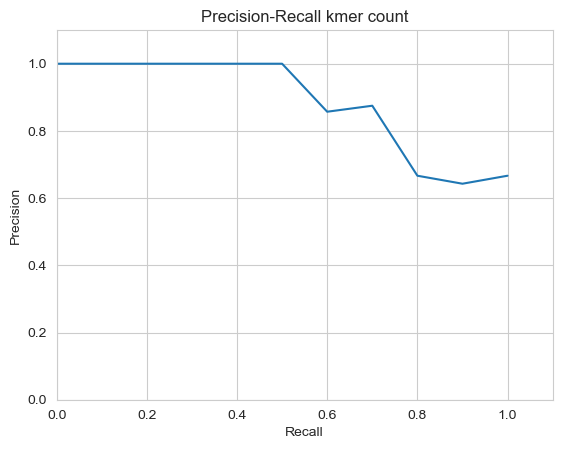

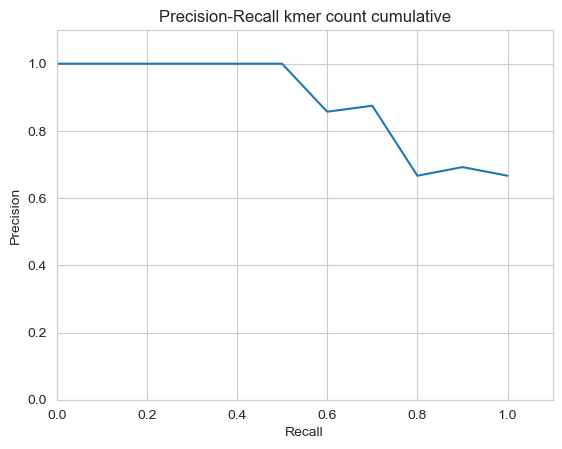

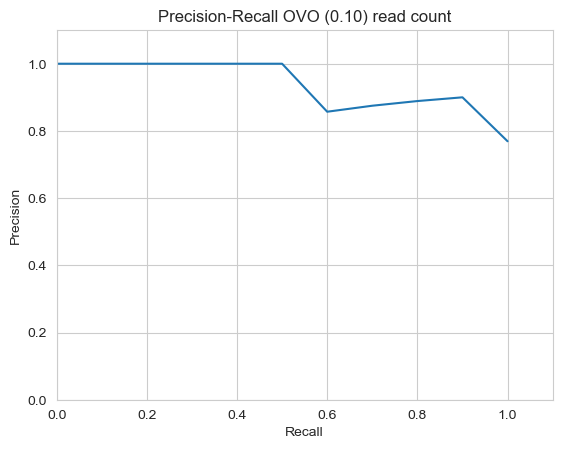

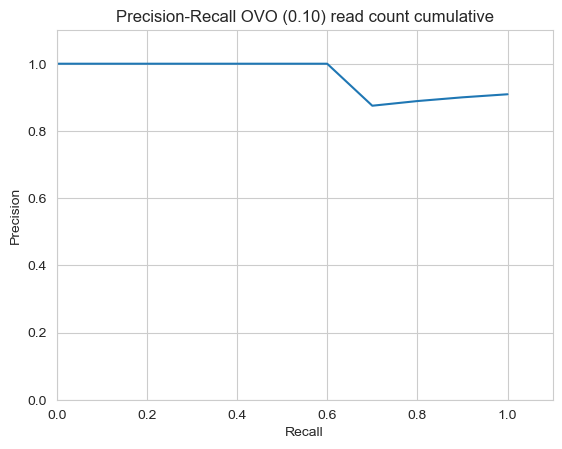

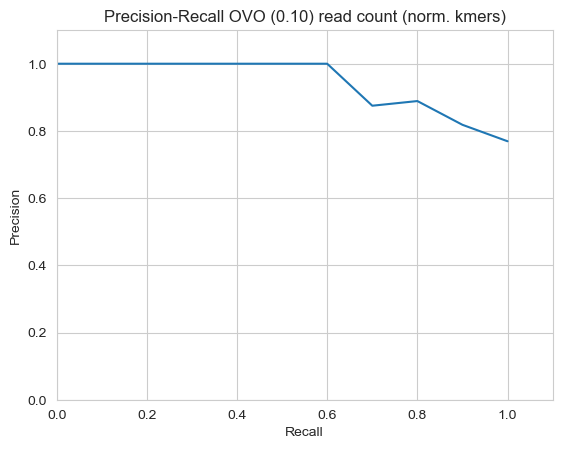

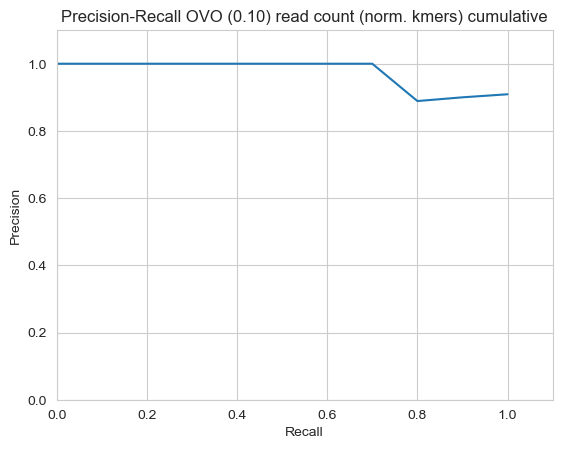

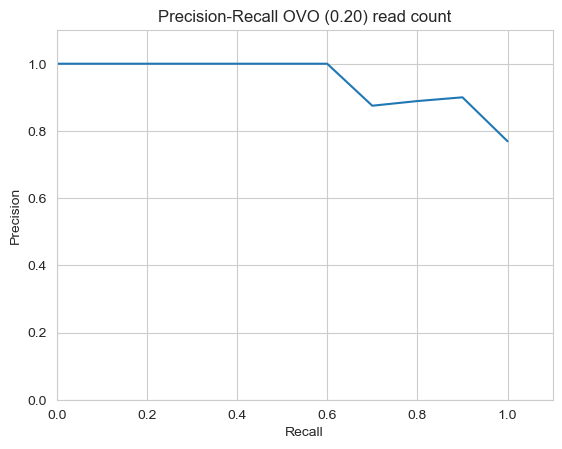

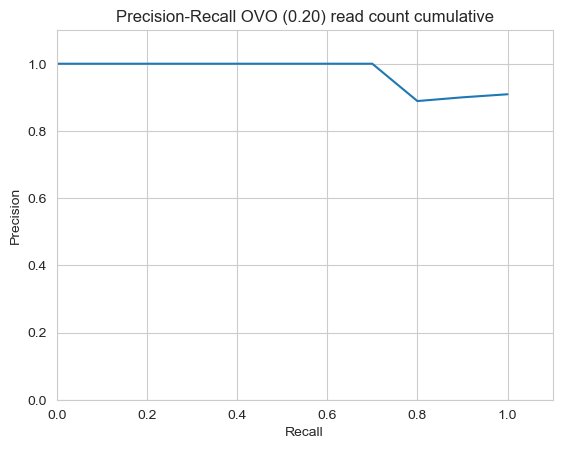

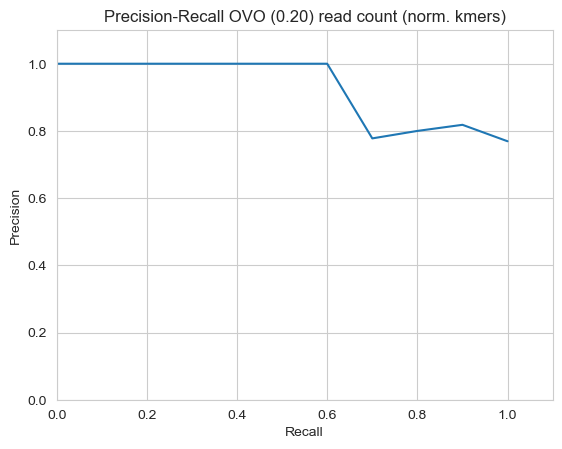

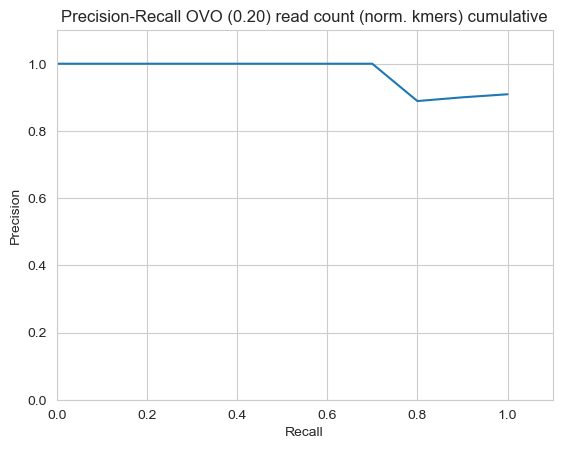

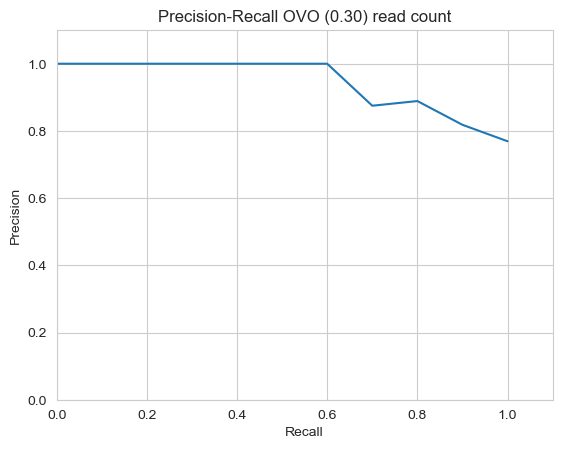

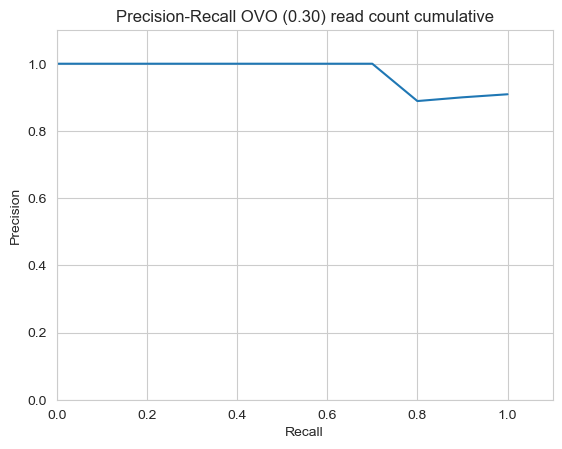

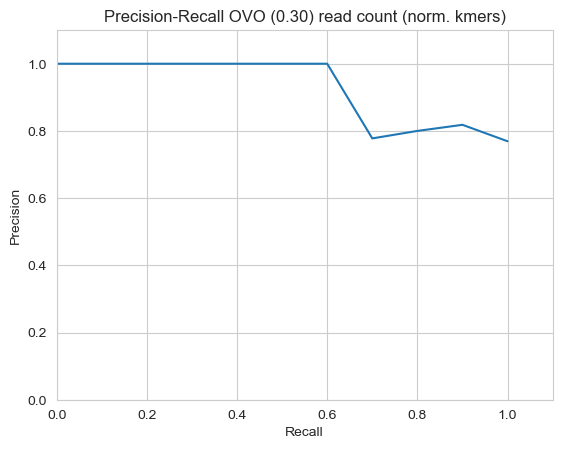

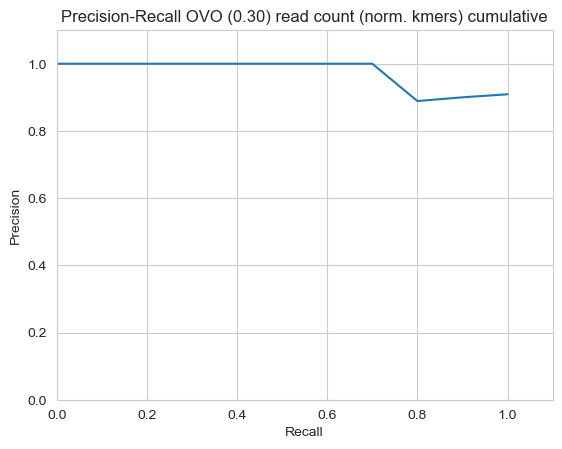

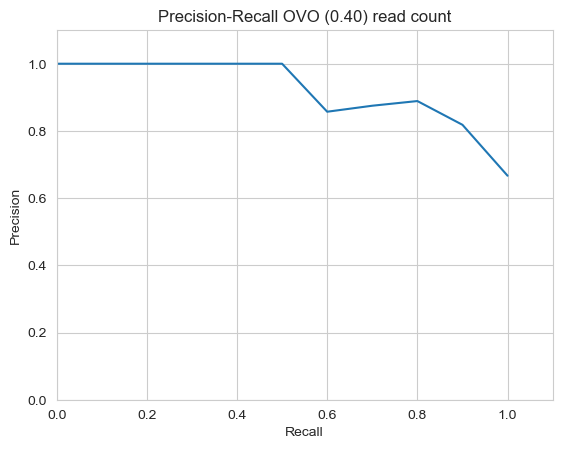

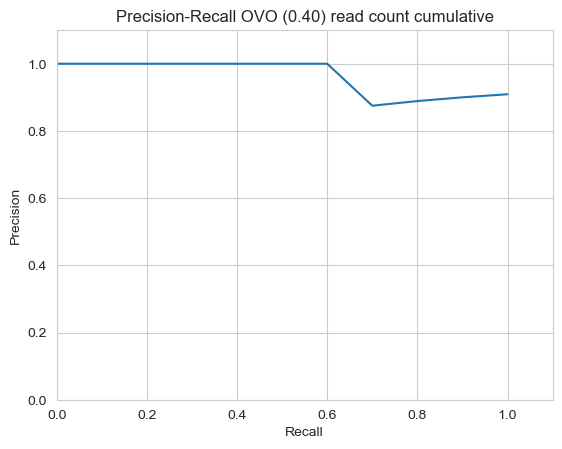

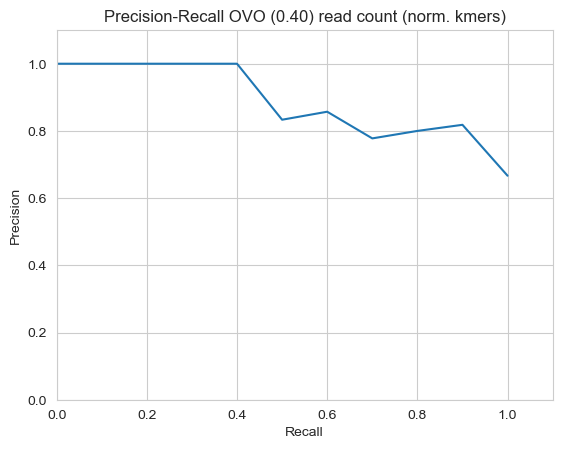

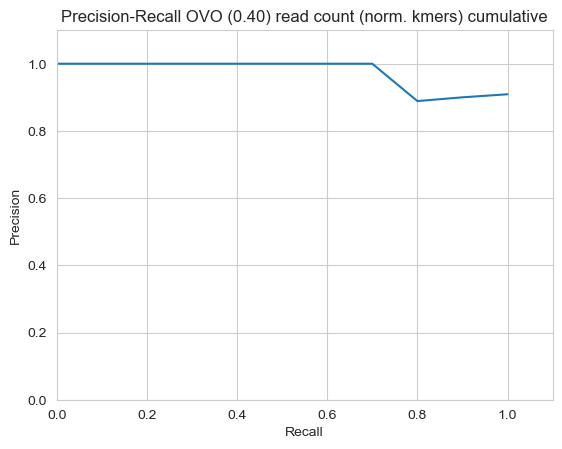

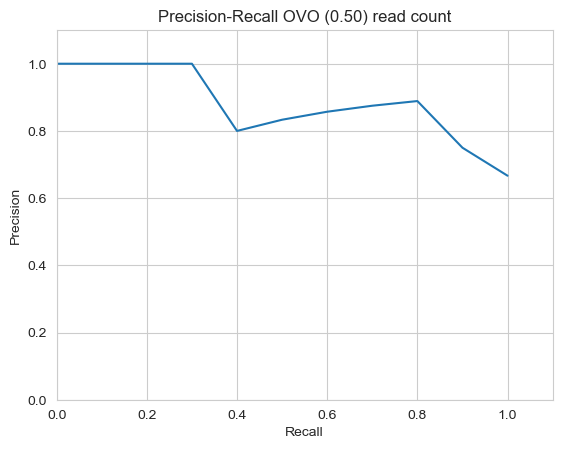

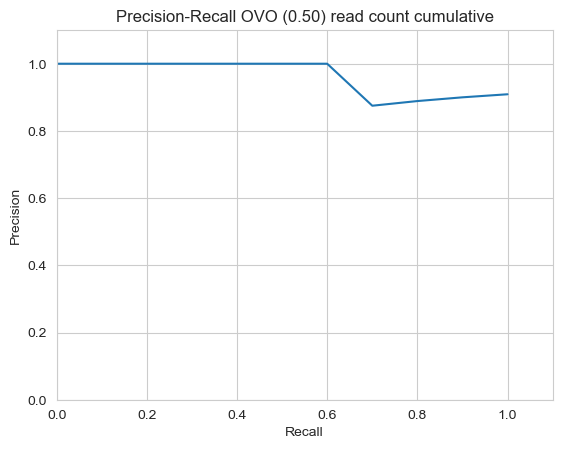

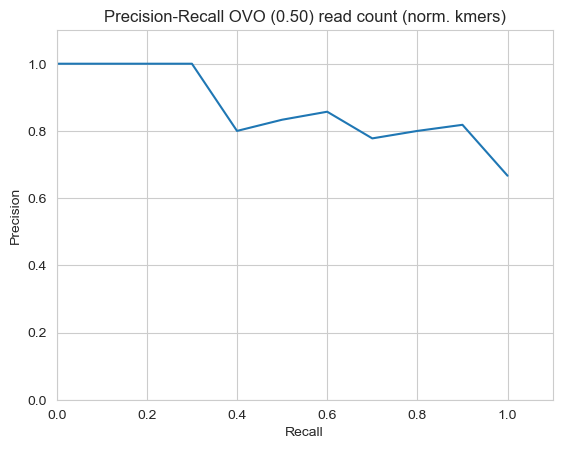

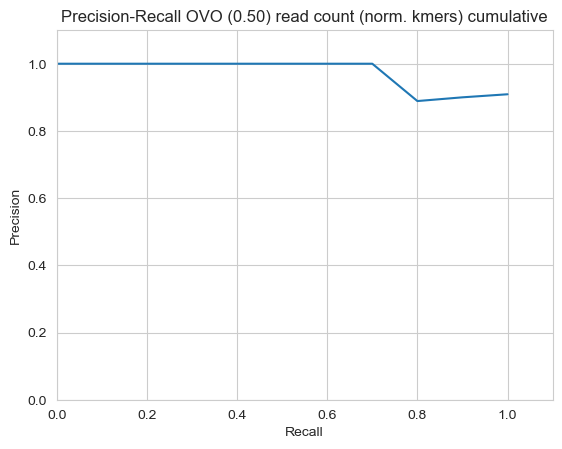

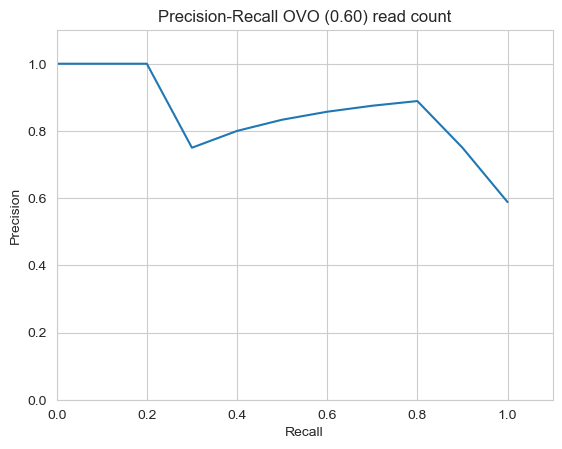

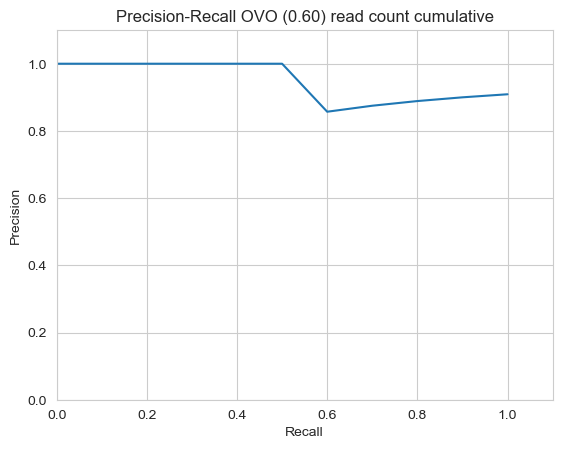

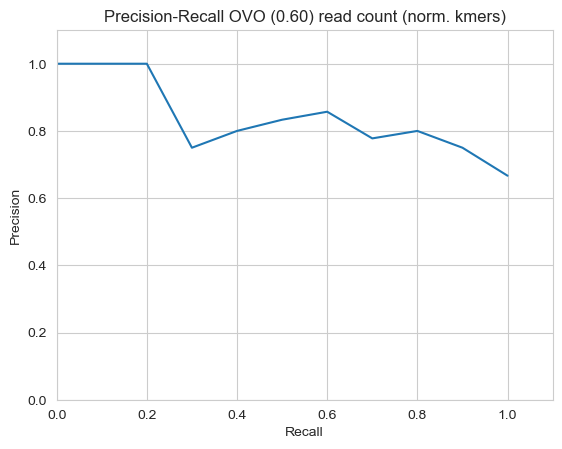

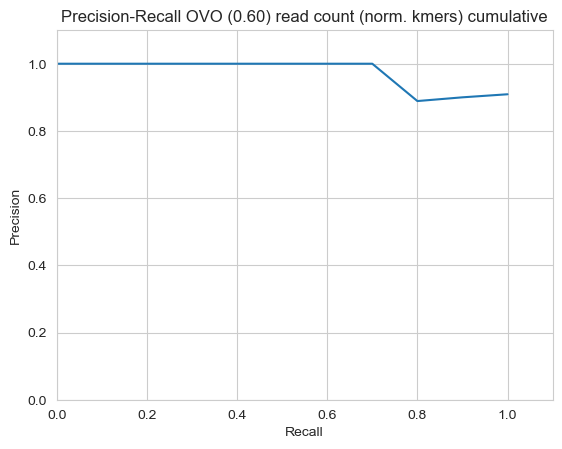

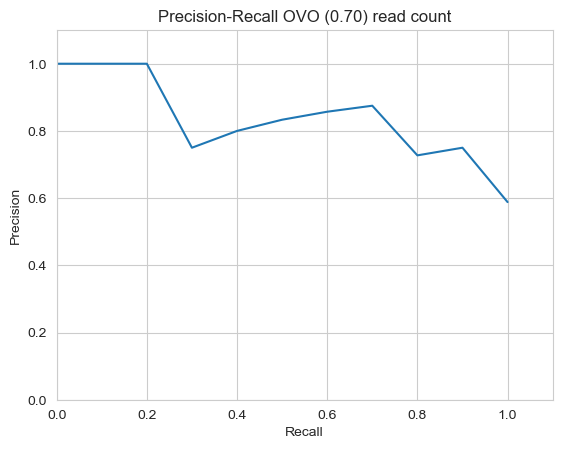

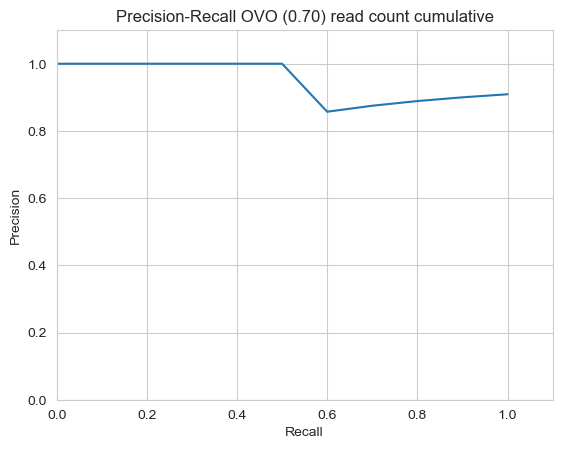

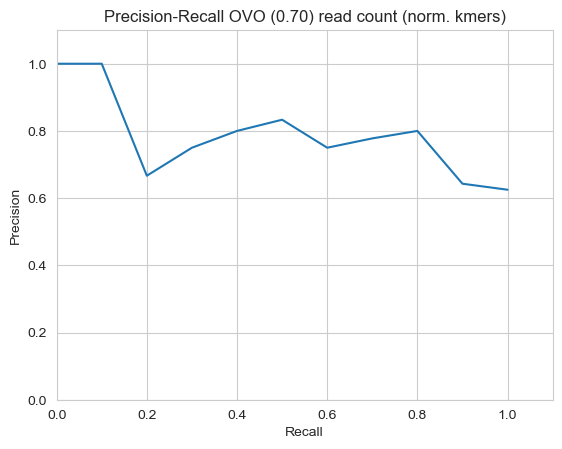

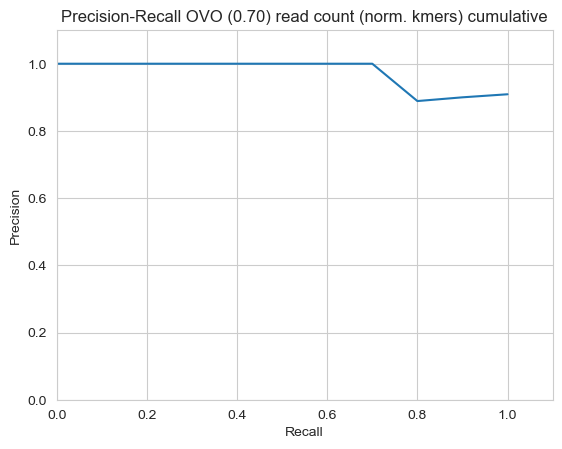

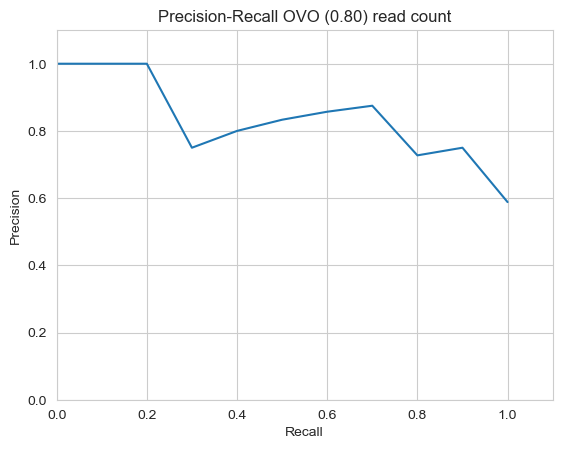

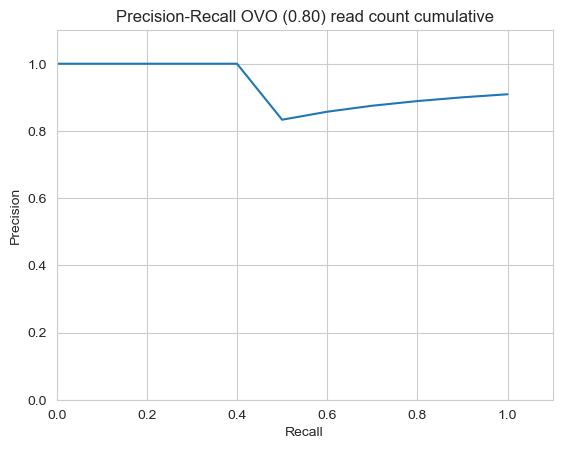

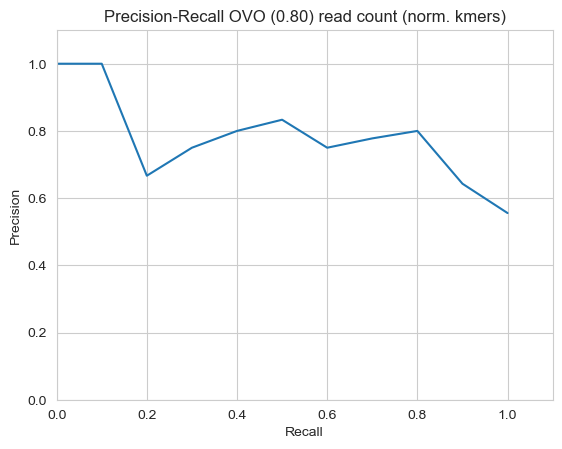

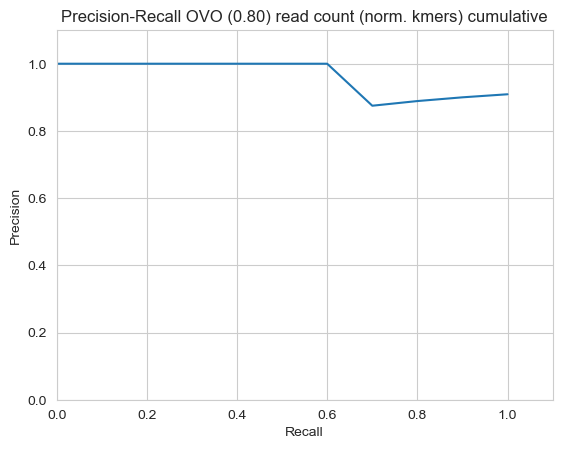

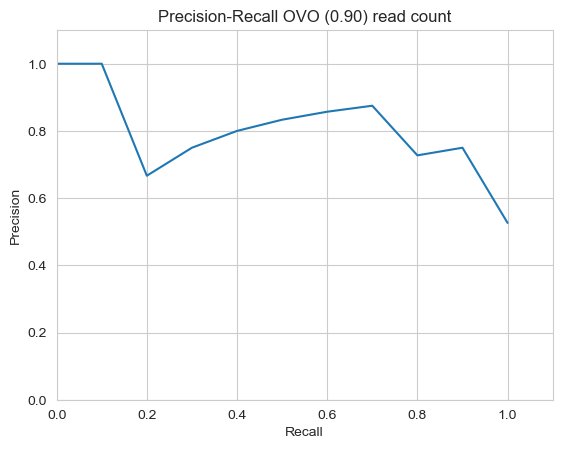

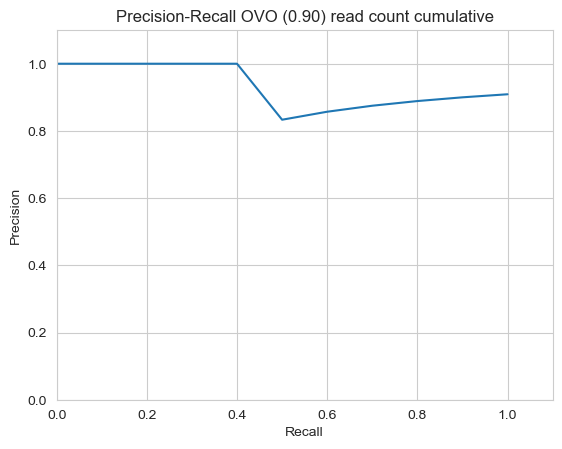

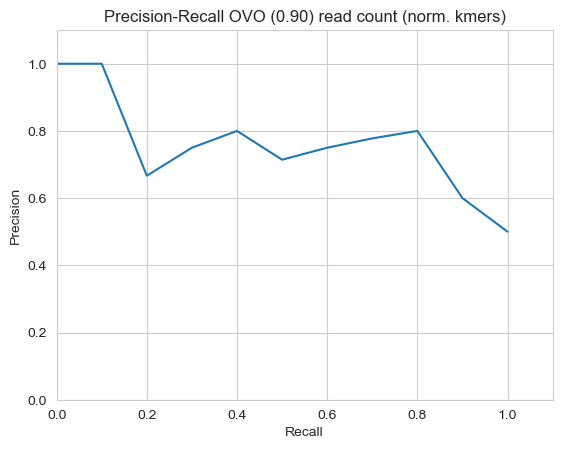

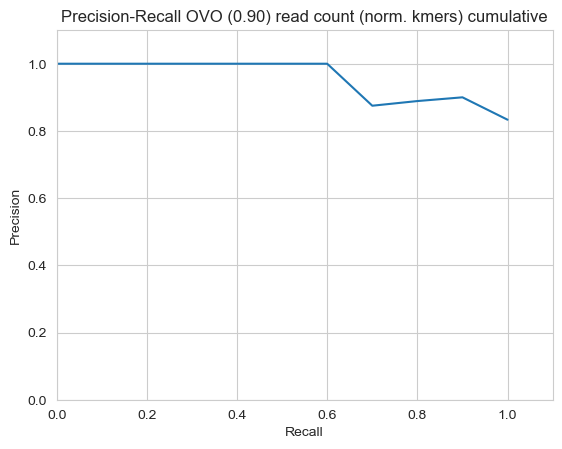

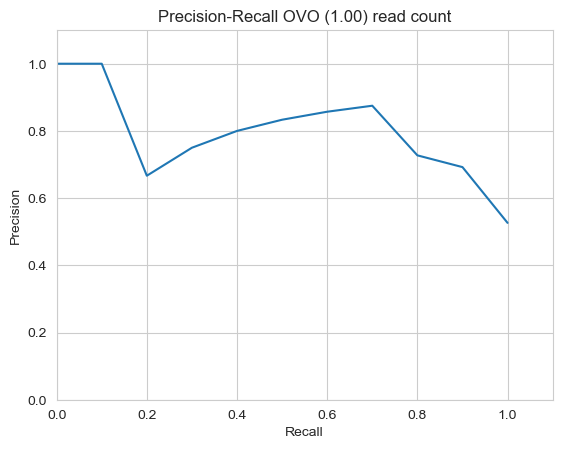

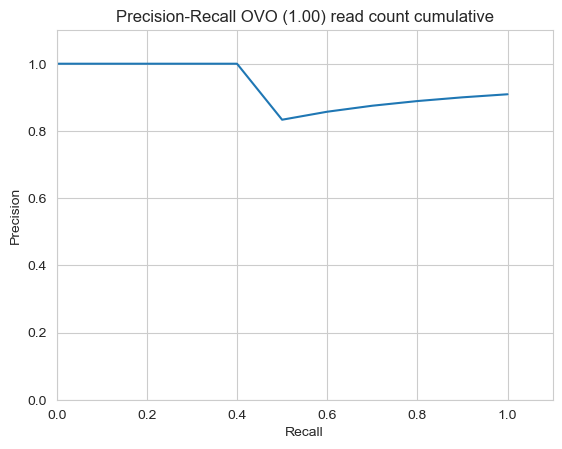

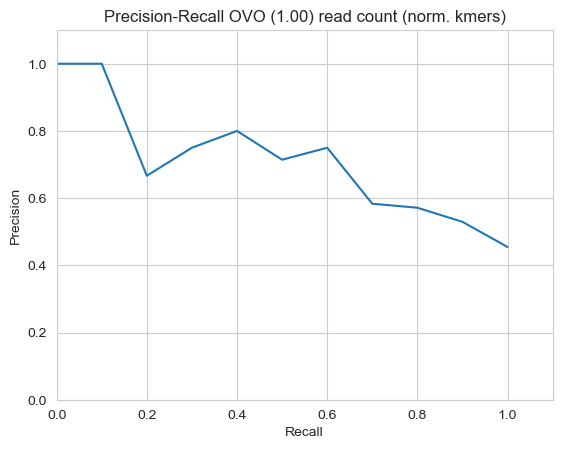

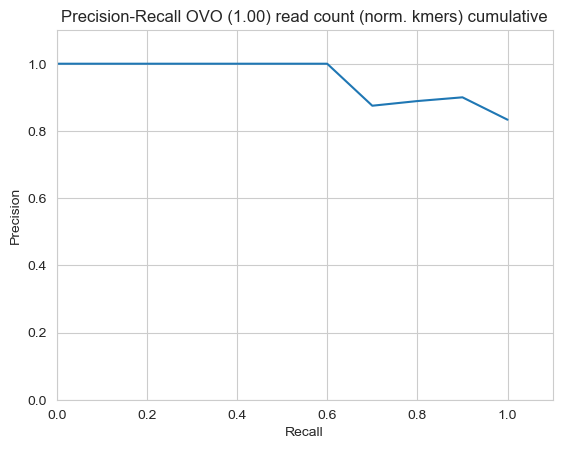

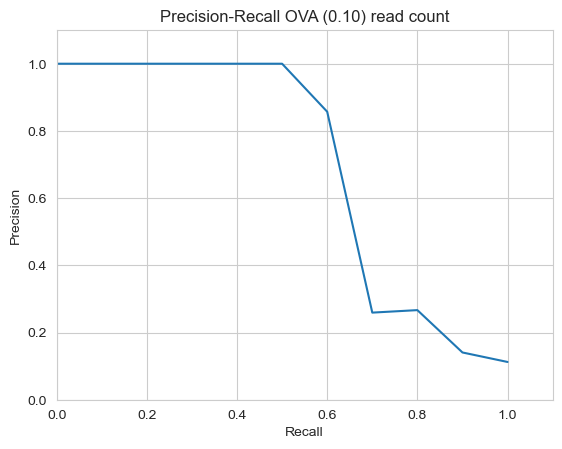

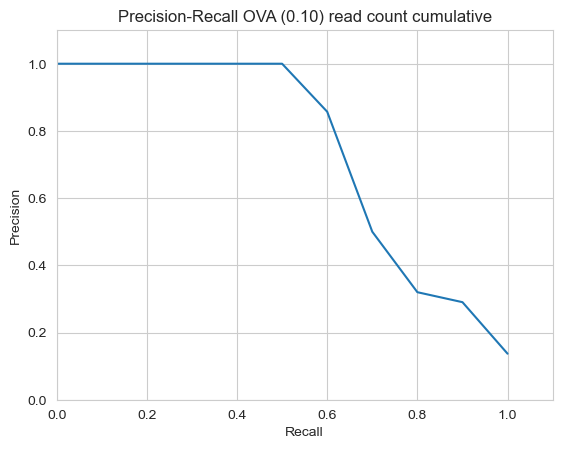

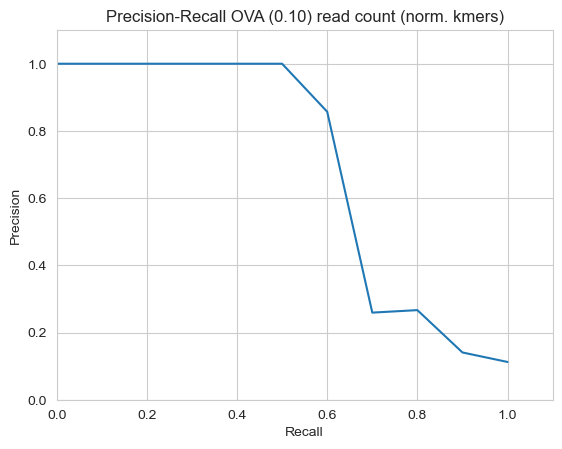

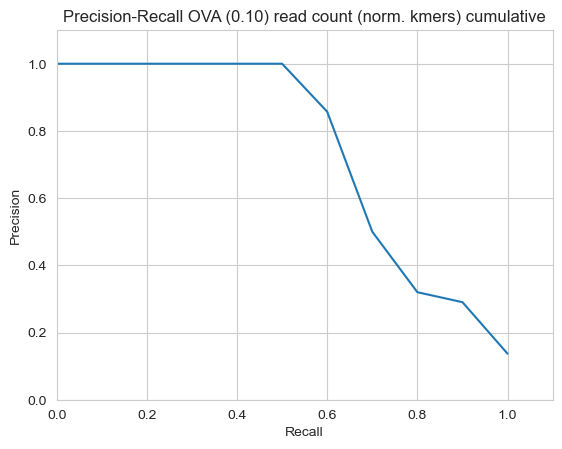

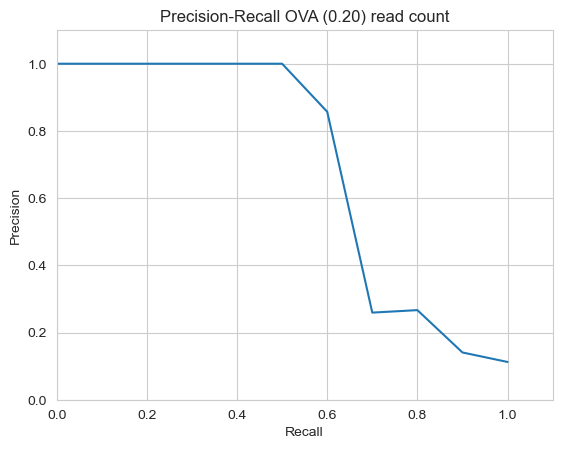

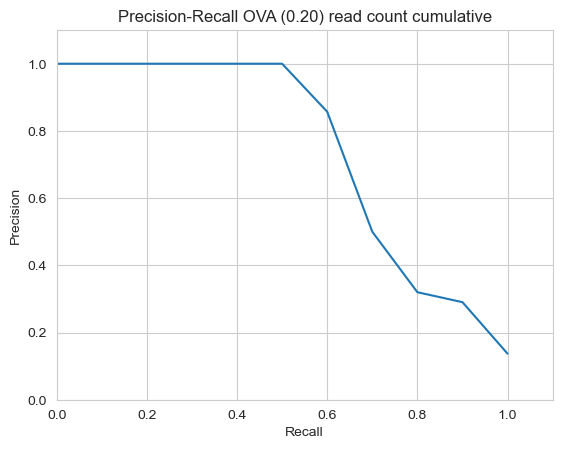

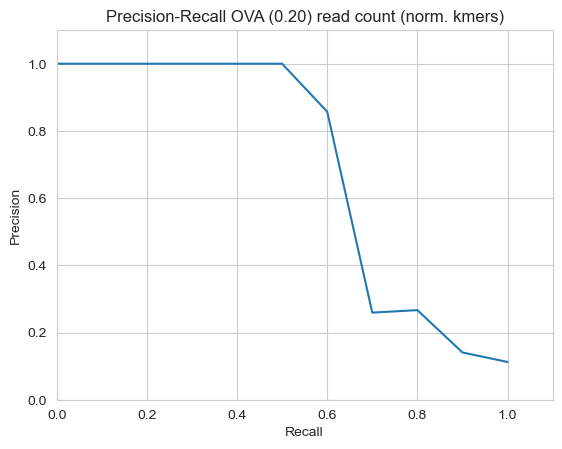

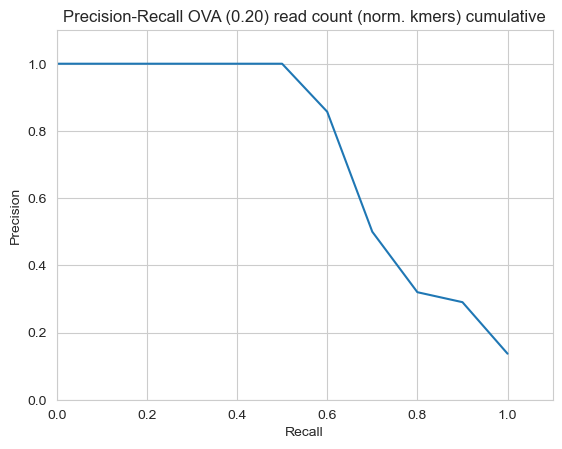

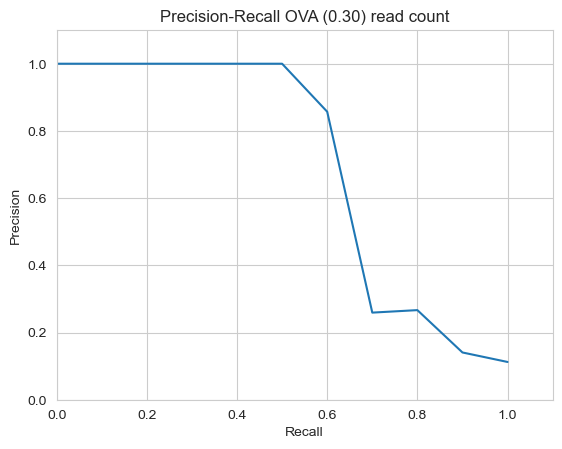

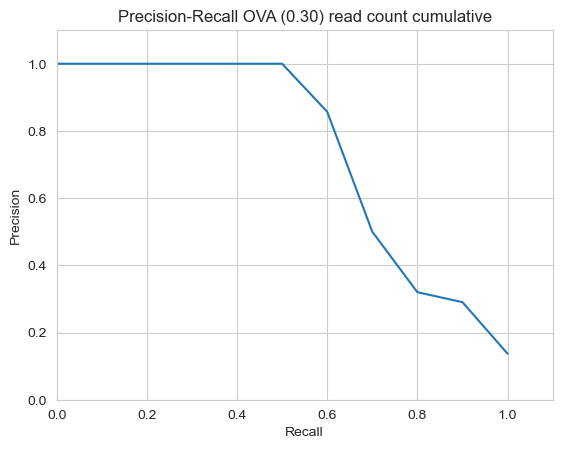

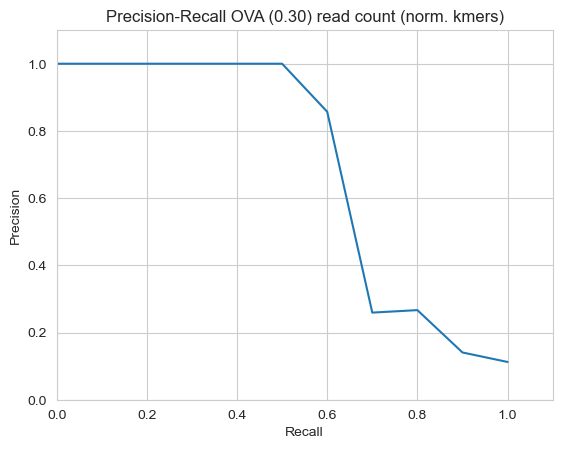

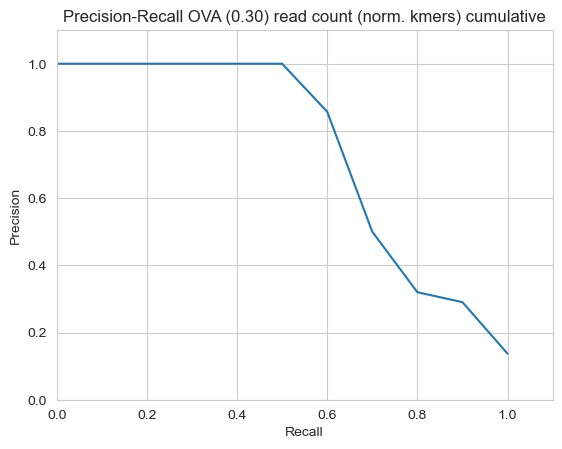

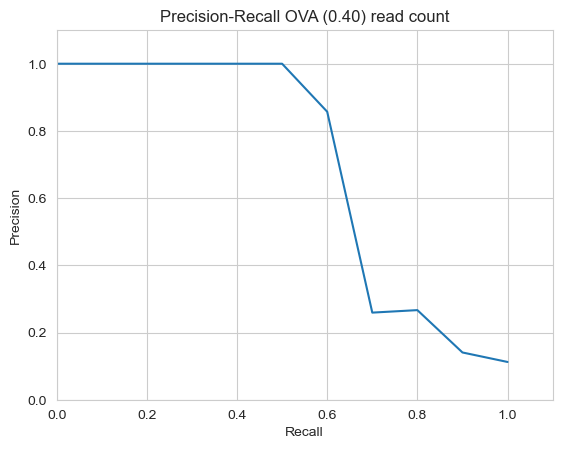

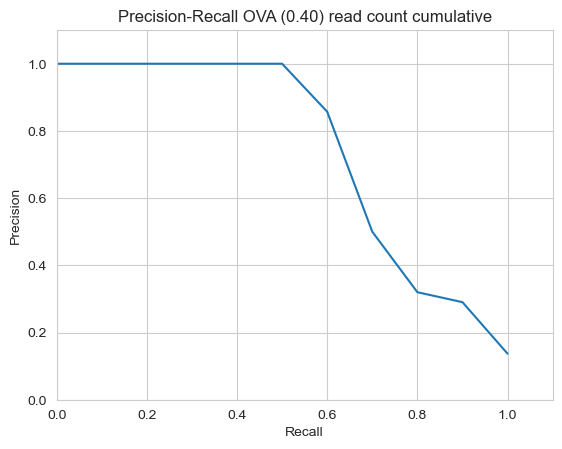

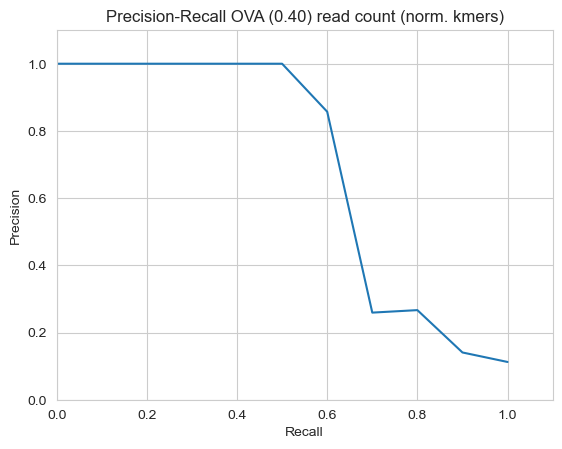

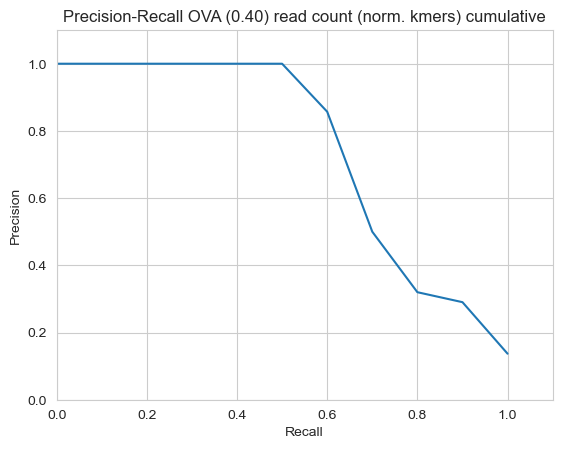

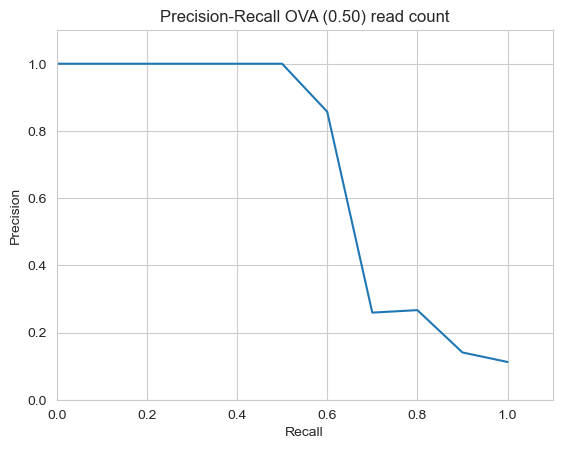

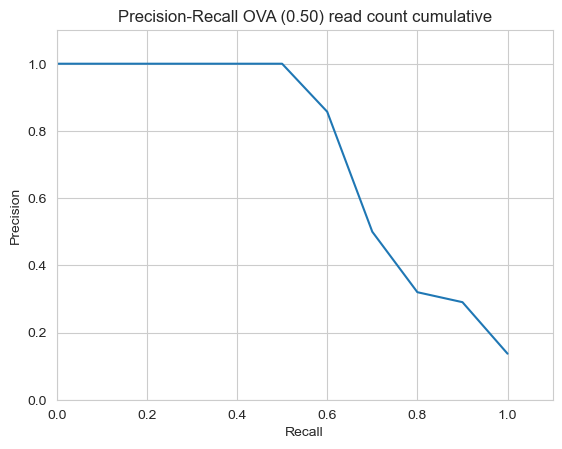

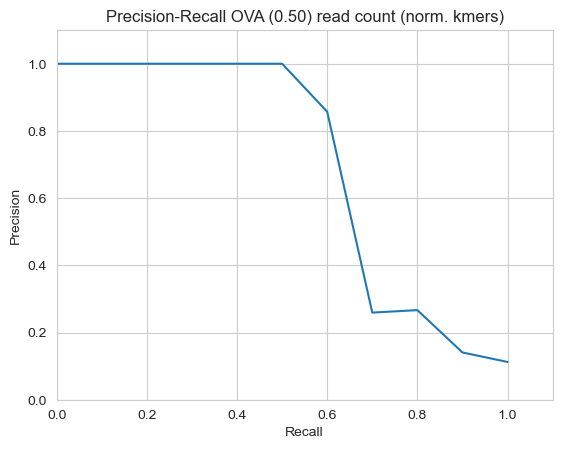

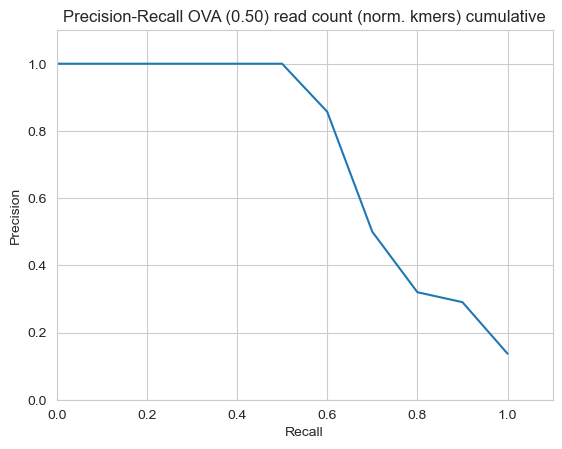

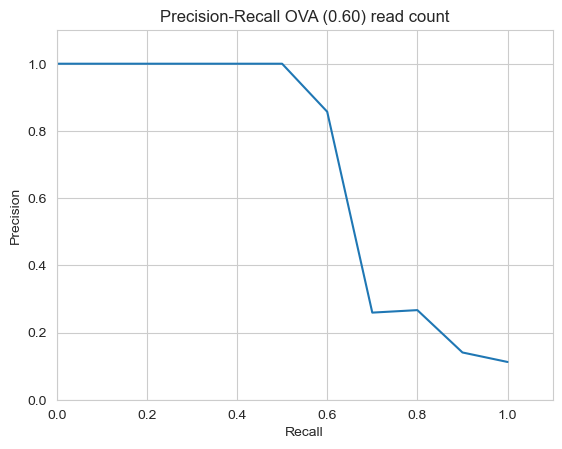

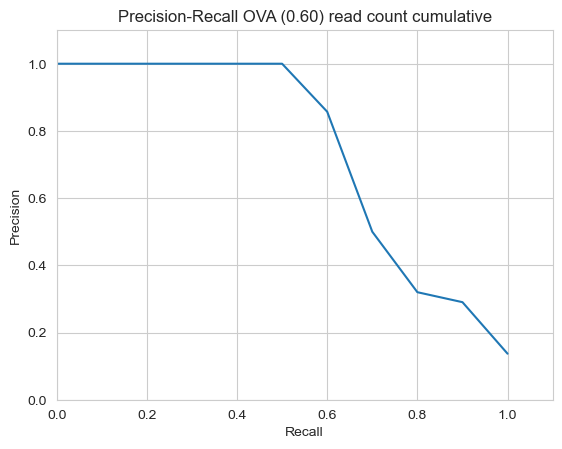

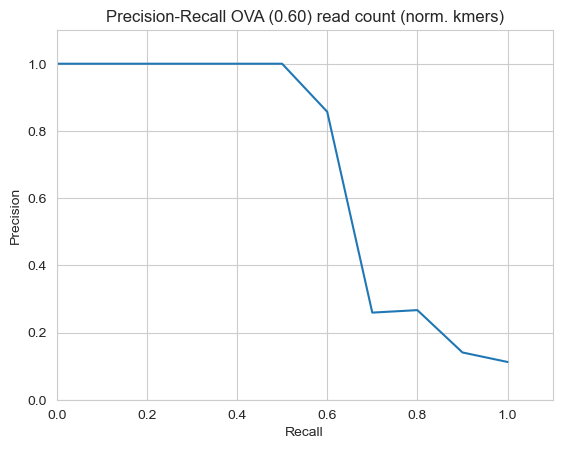

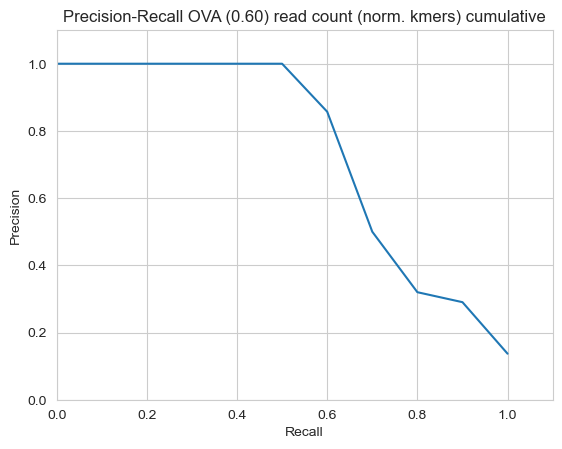

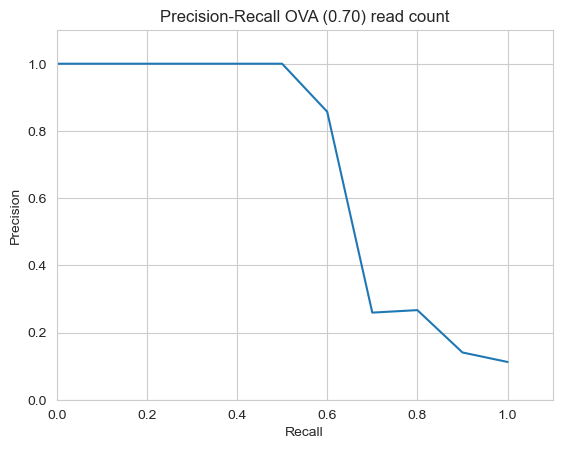

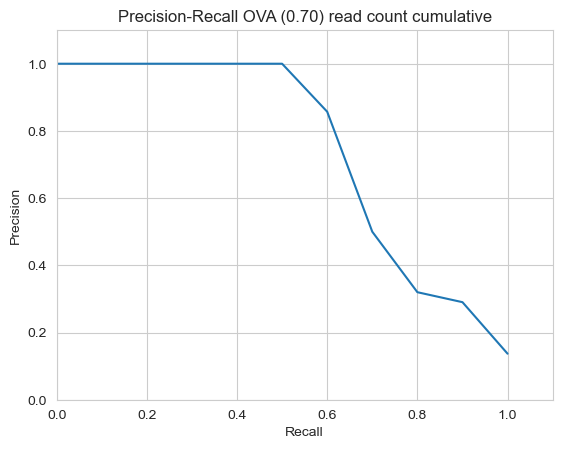

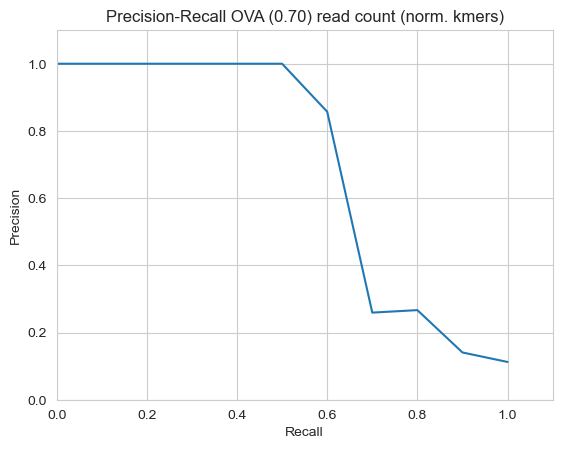

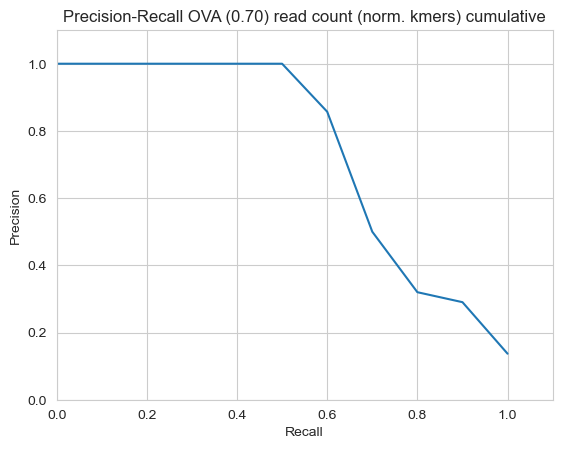

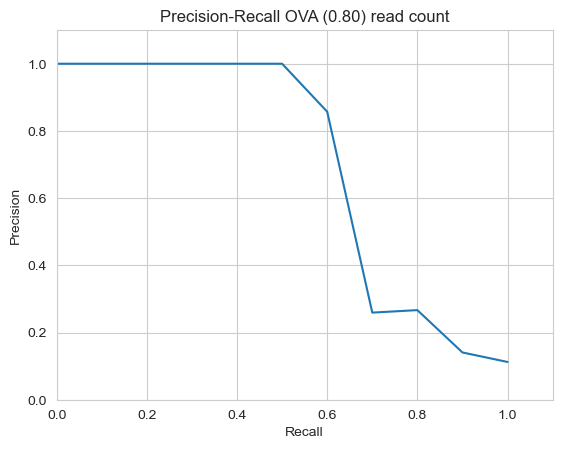

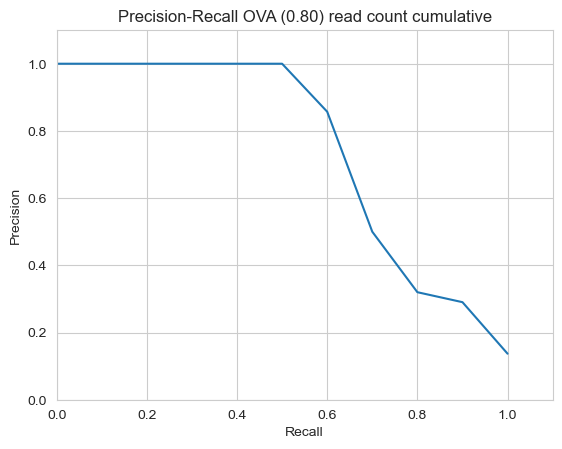

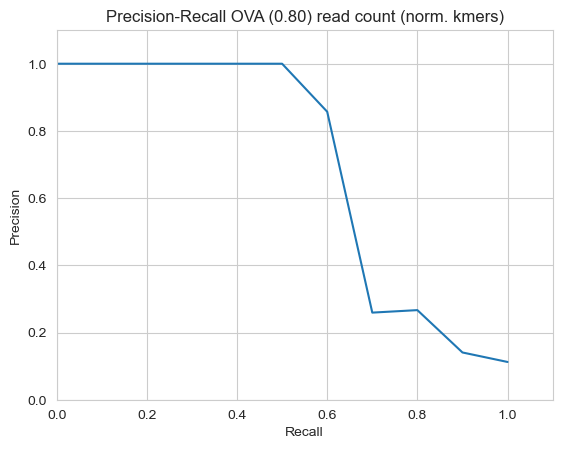

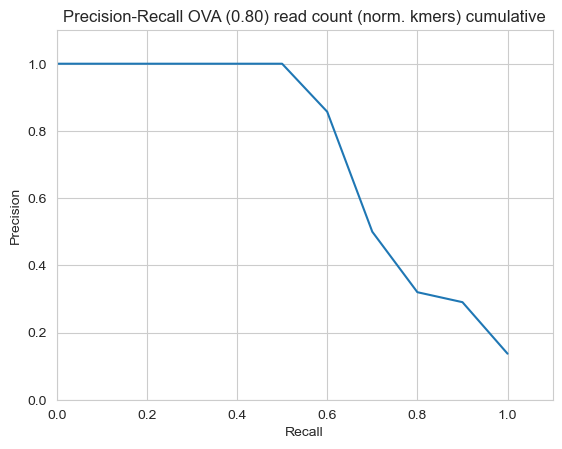

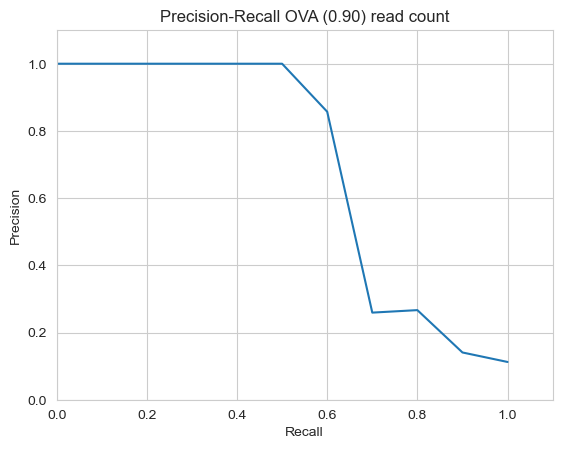

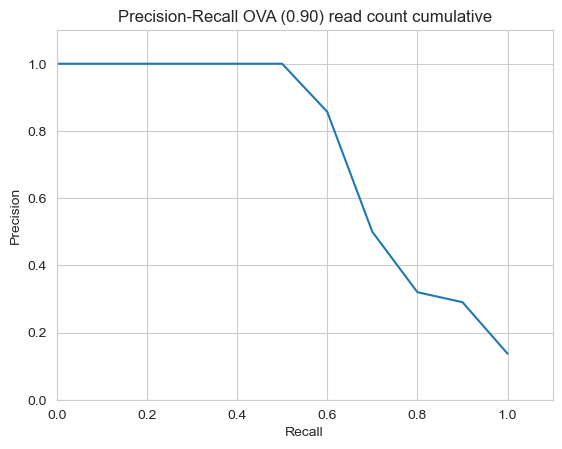

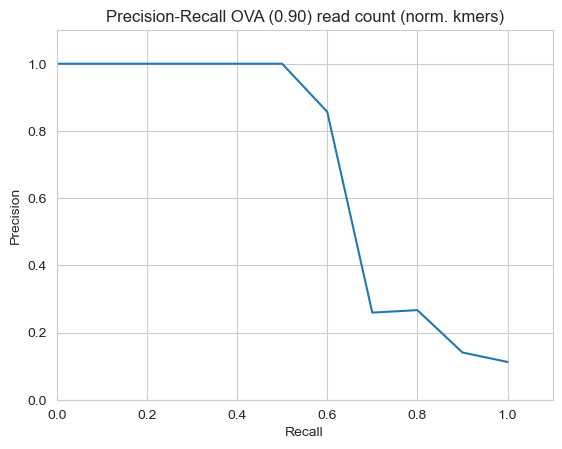

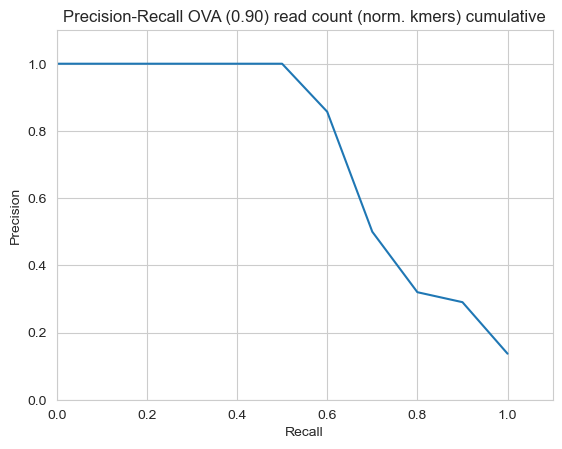

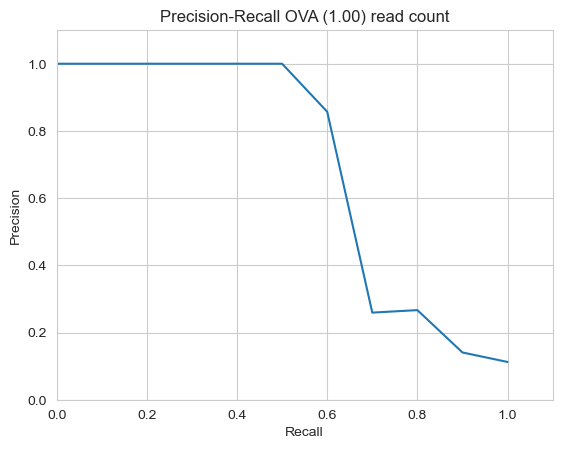

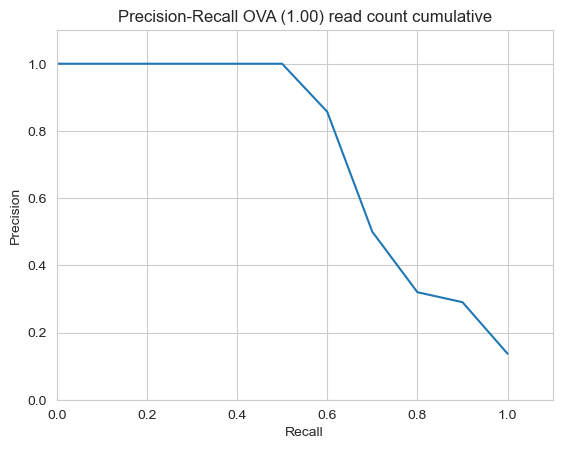

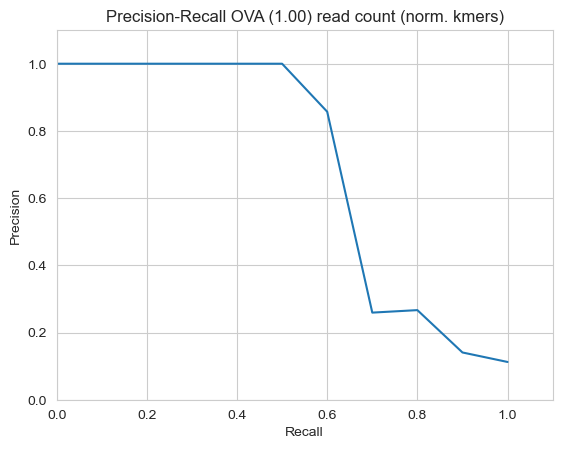

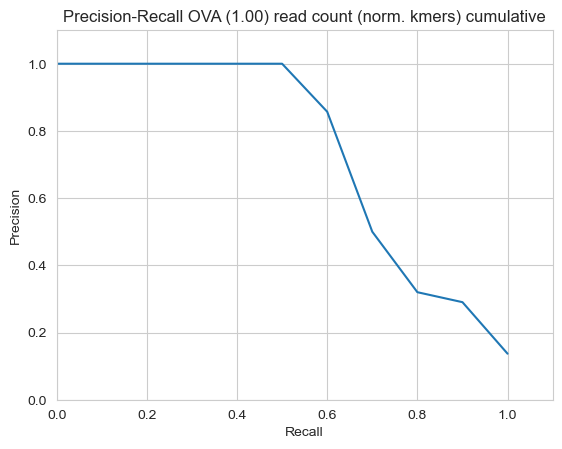

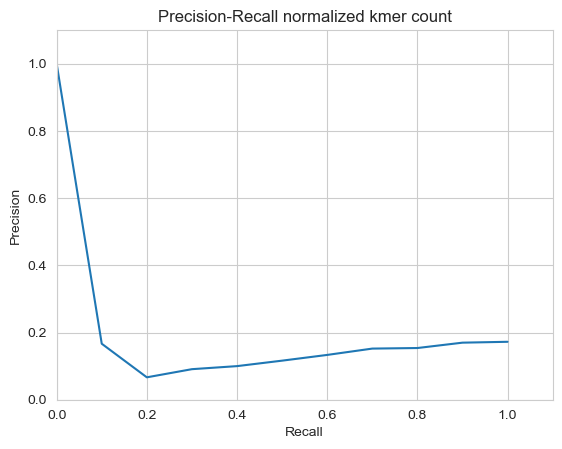

In [18]:
for column in pr["column"].unique():
    for rank in ["species"]: # pr["rank"].unique()
        data = pr[(pr["column"] == column) & (pr["rank"] == rank)]
        plt.plot(data["recall"], data["precision"], label=rank)
    plt.xlim(0, 1.1)
    plt.xlabel("Recall")
    plt.ylim(0, 1.1)
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall {column}")
    plt.show()

In [5]:
df_kraken = read_per_taxon_assignment("F:/Studium/Master/semester5/thesis/data/test_dataset/assignment_kraken2_nr_processed/per_taxon_assignments.tsv")
pr_kraken = get_precision_recall(df_kraken, true_taxons, total, ignor_cols=["node id", "rank"])

In [15]:
pr_kraken[pr_kraken["rank"] == "species"].groupby(["rank", "column"]).apply(lambda x: auc(x["recall"], x["precision"])).reset_index(name="auc").sort_values("auc", ascending=False)

,rank,column,auc
21,species,OVO (0.10) read count cumulative,0.974343
29,species,OVO (0.50) read count cumulative,0.974343
27,species,OVO (0.40) read count cumulative,0.974343
25,species,OVO (0.30) read count cumulative,0.974343
23,species,OVO (0.20) read count cumulative,0.974343
35,species,OVO (0.80) read count cumulative,0.961843
33,species,OVO (0.70) read count cumulative,0.961843
31,species,OVO (0.60) read count cumulative,0.961843
22,species,OVO (0.20) read count,0.954850
39,species,OVO (1.00) read count cumulative,0.947558


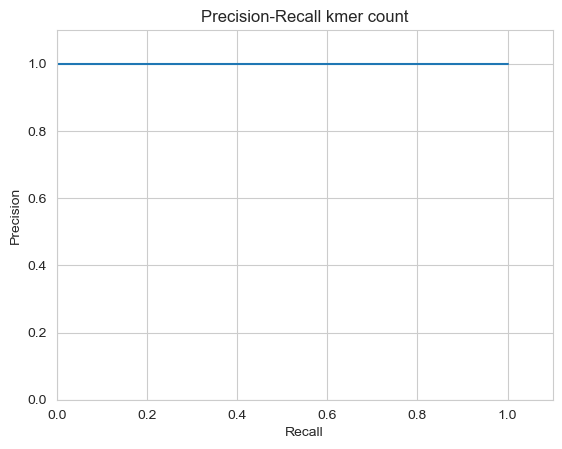

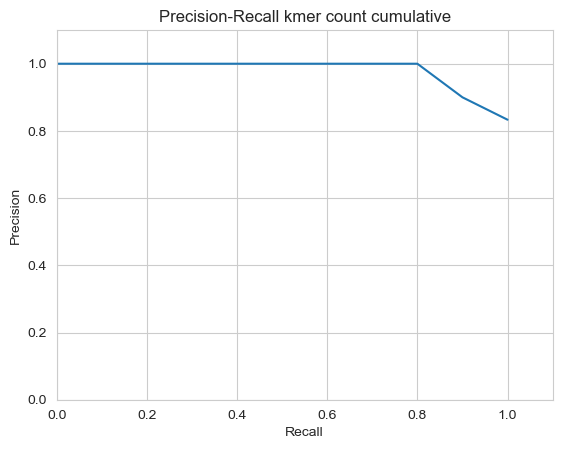

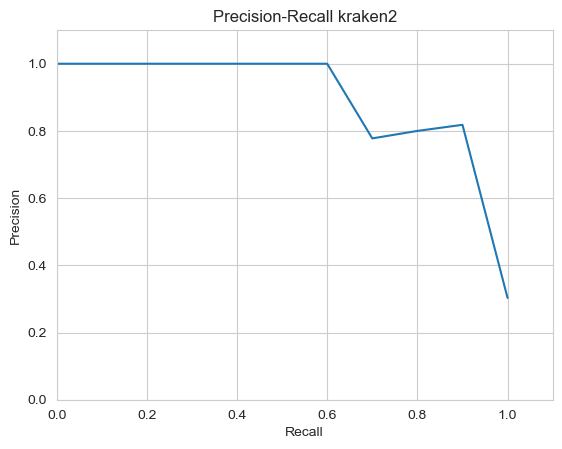

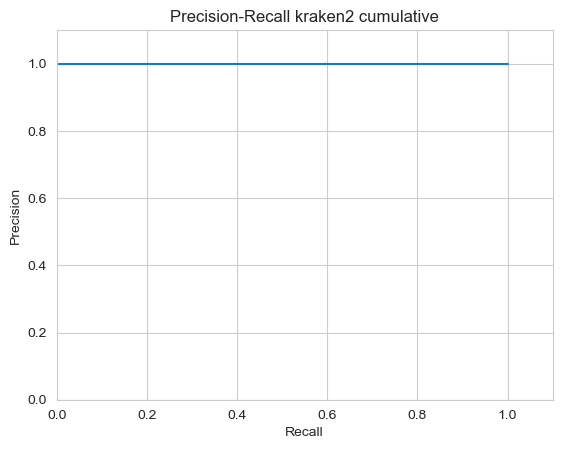

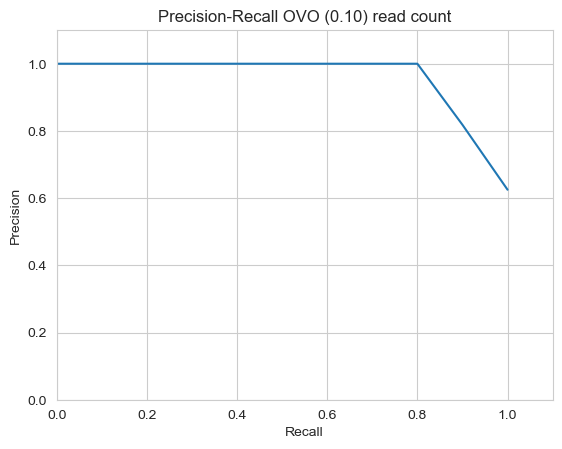

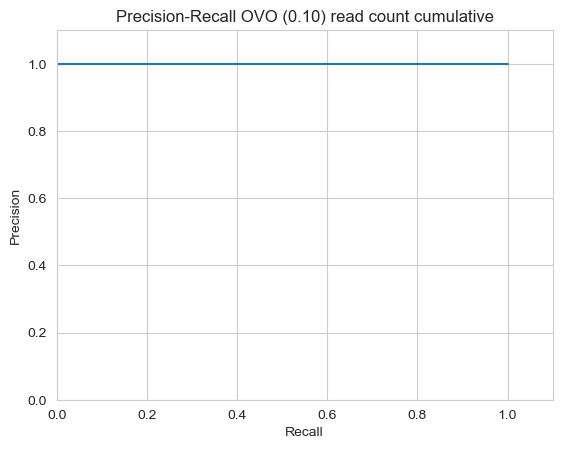

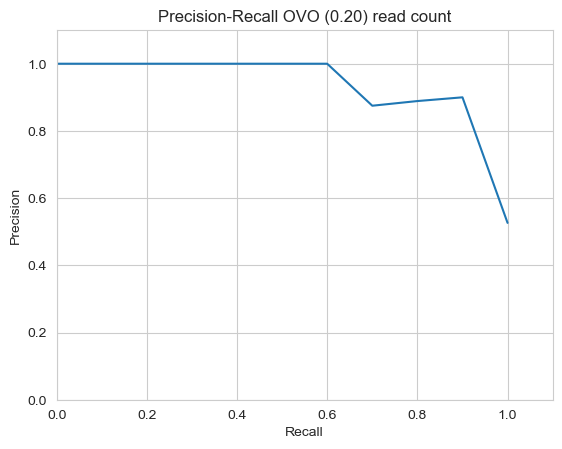

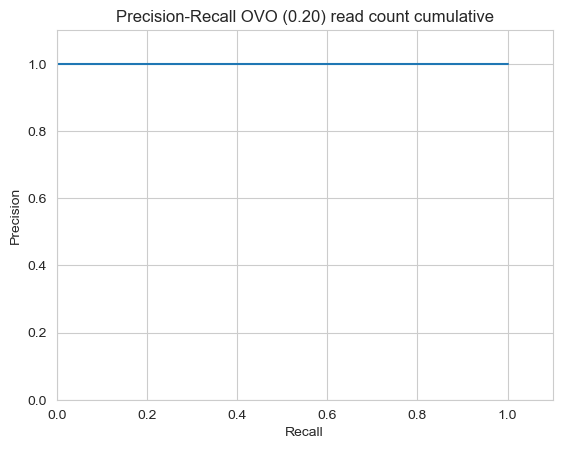

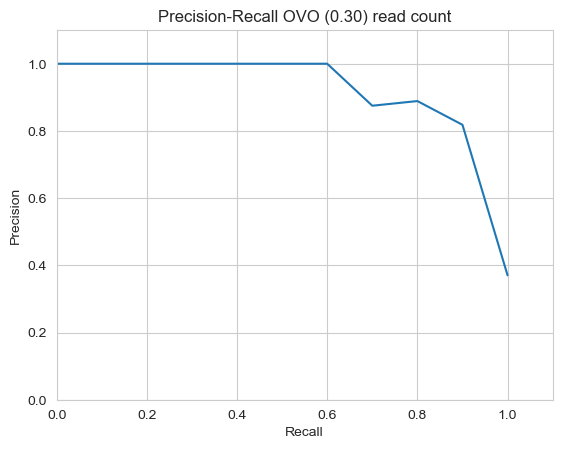

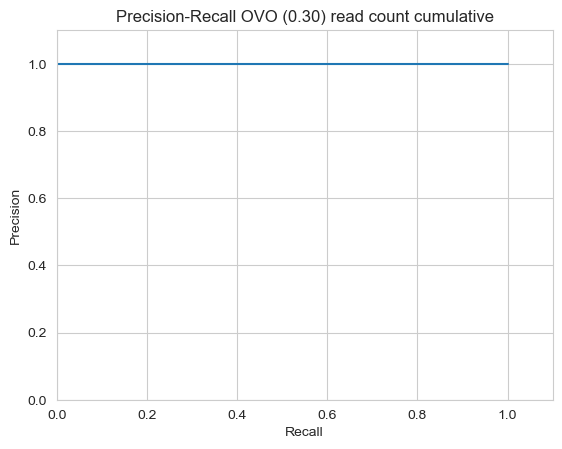

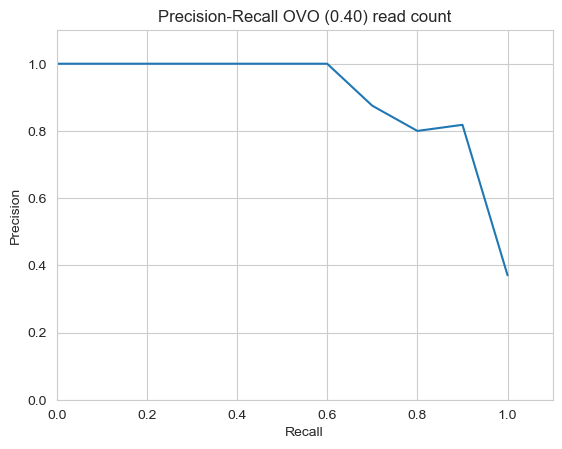

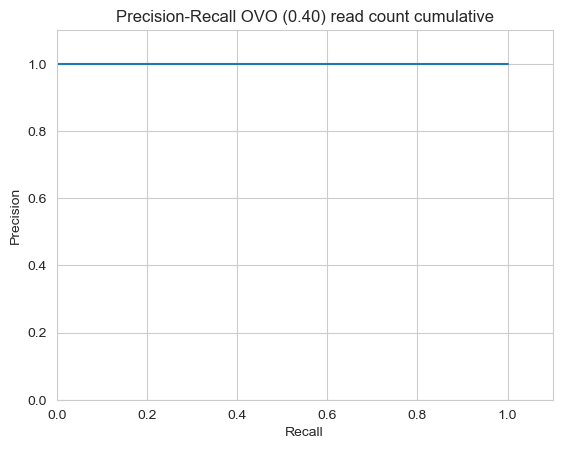

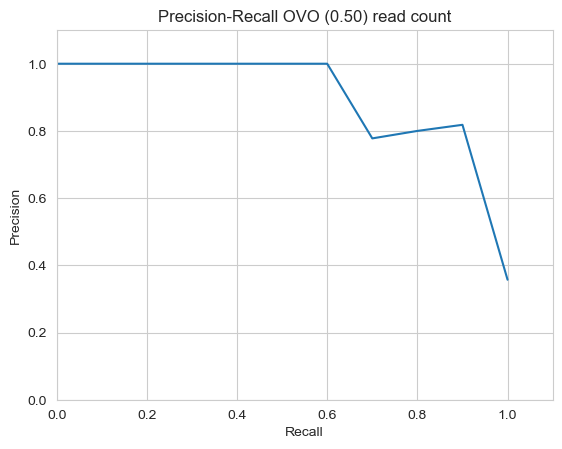

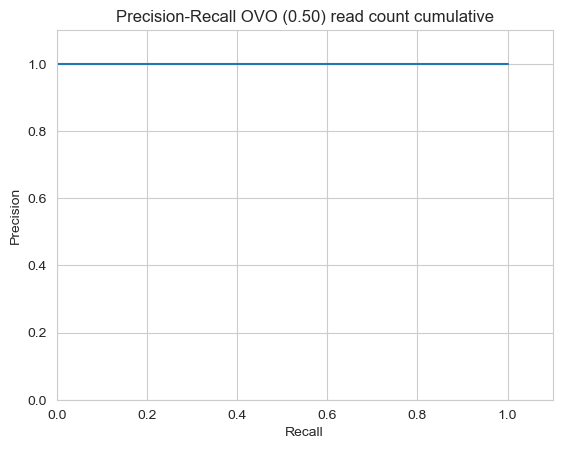

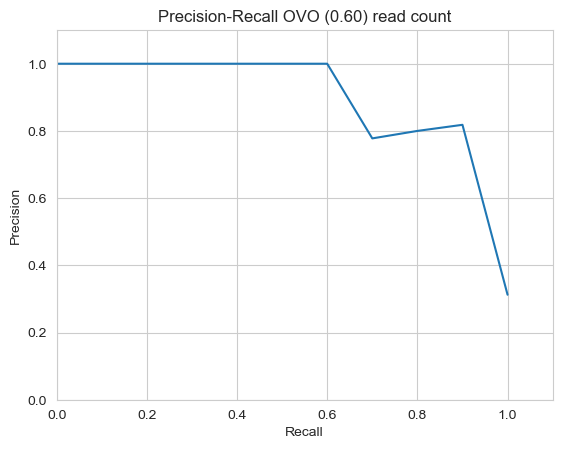

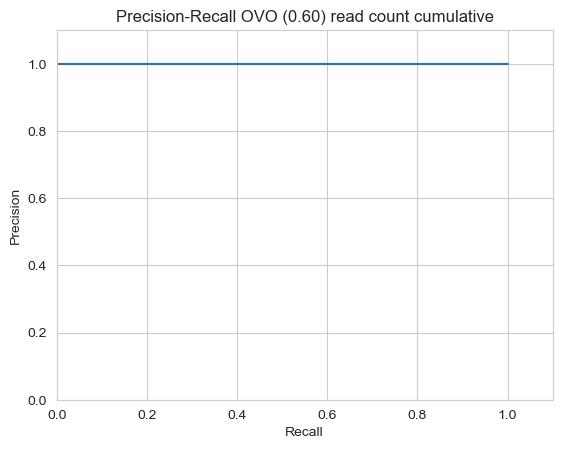

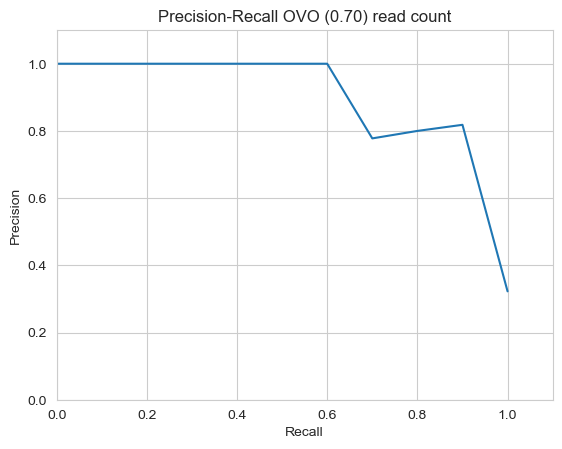

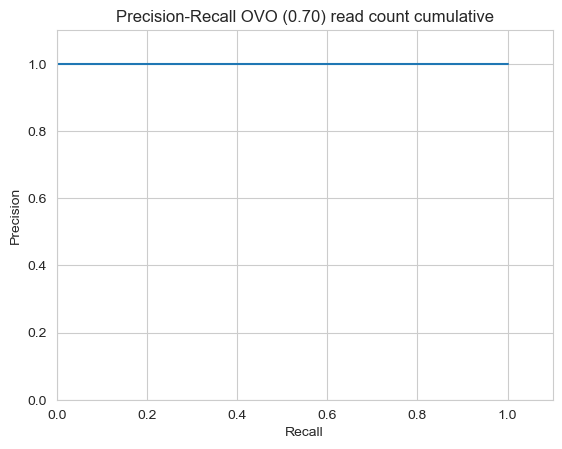

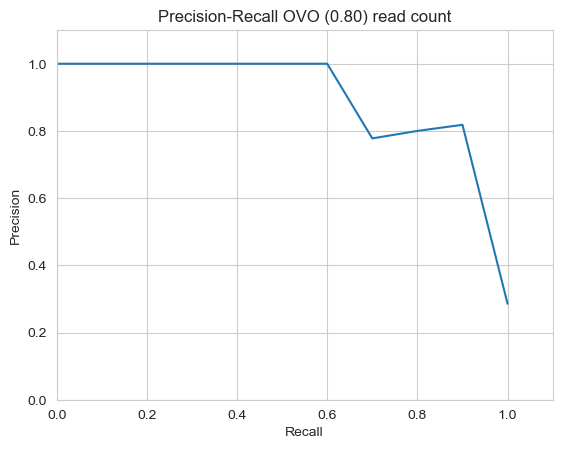

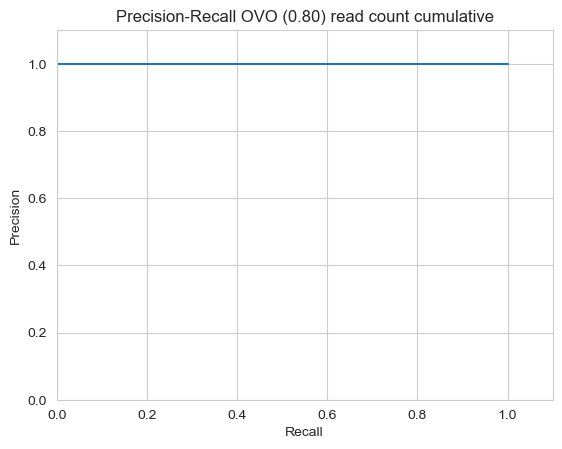

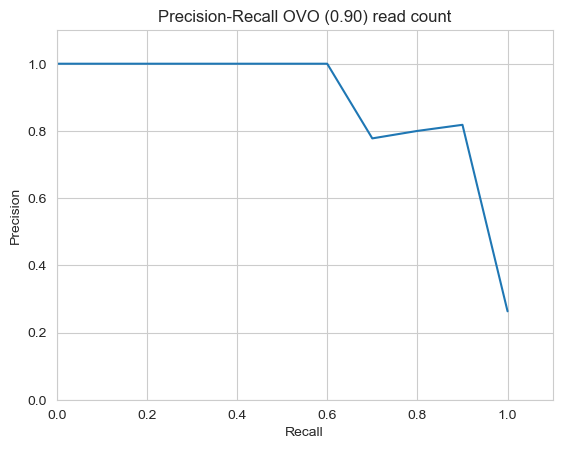

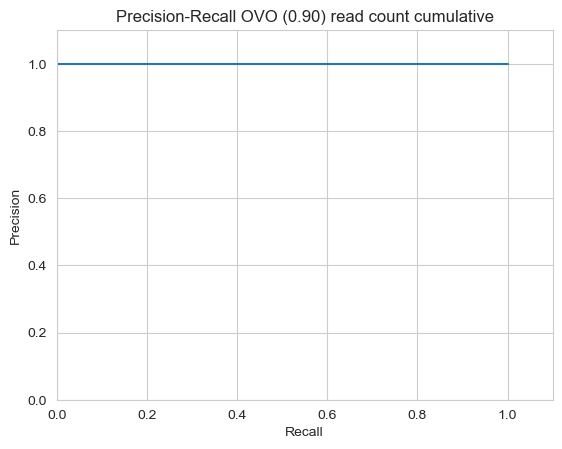

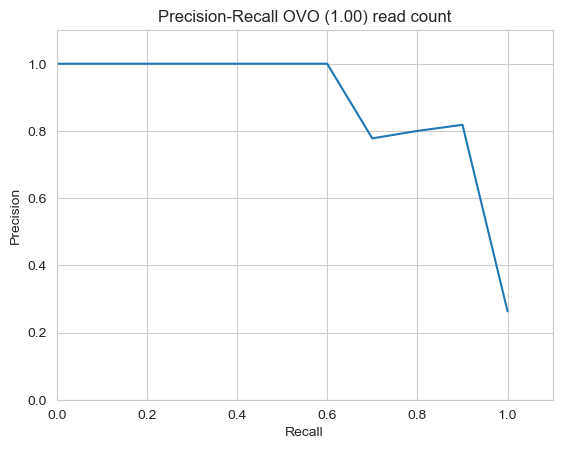

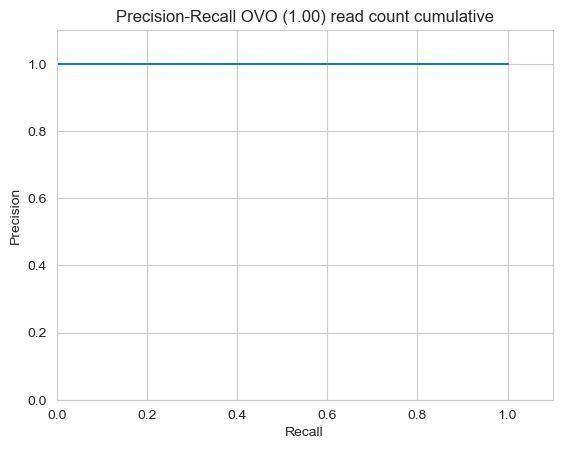

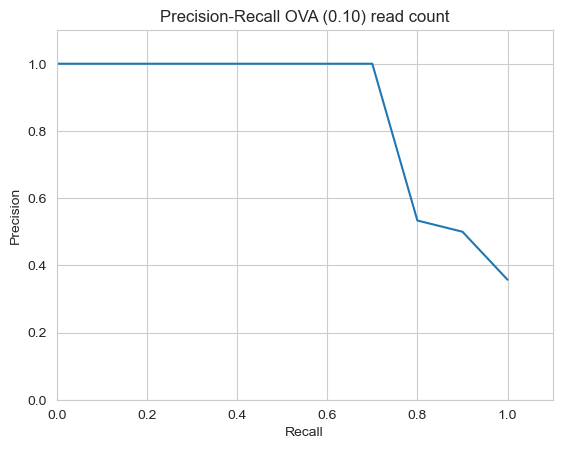

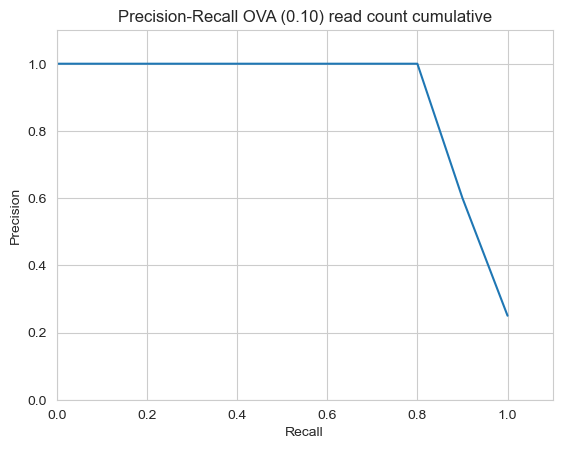

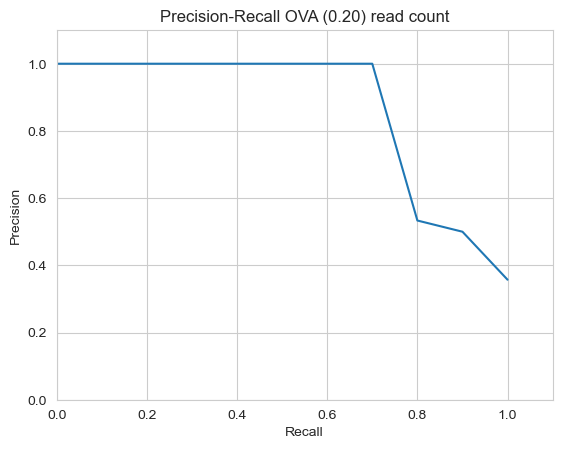

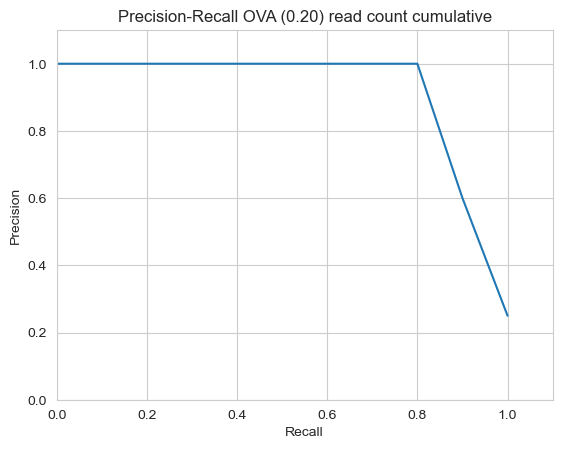

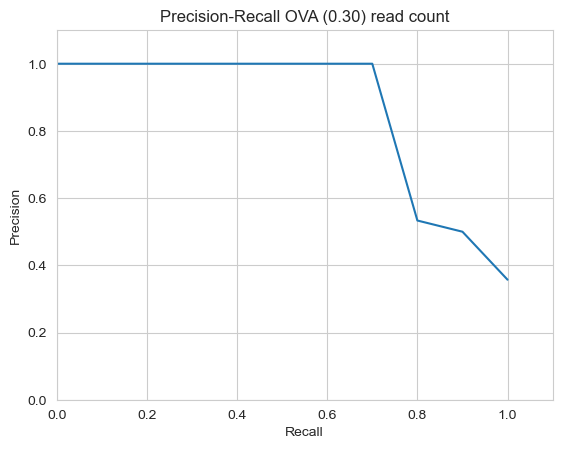

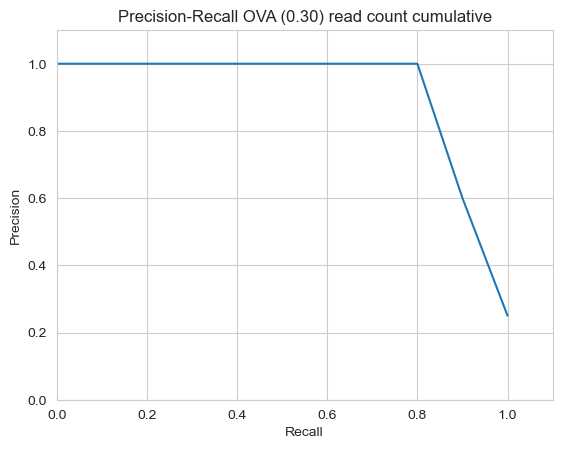

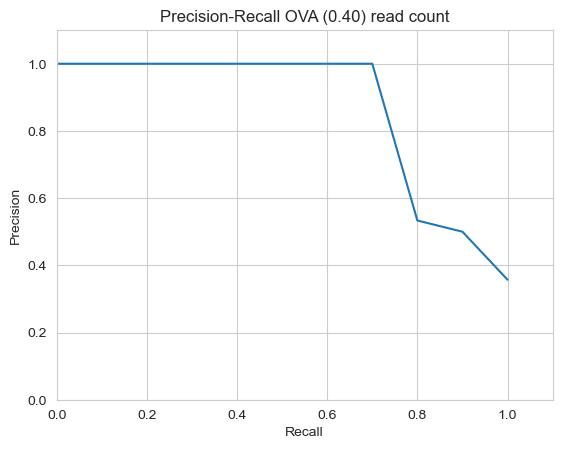

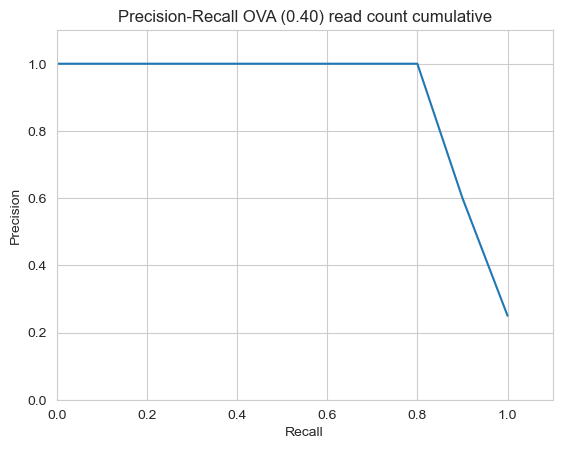

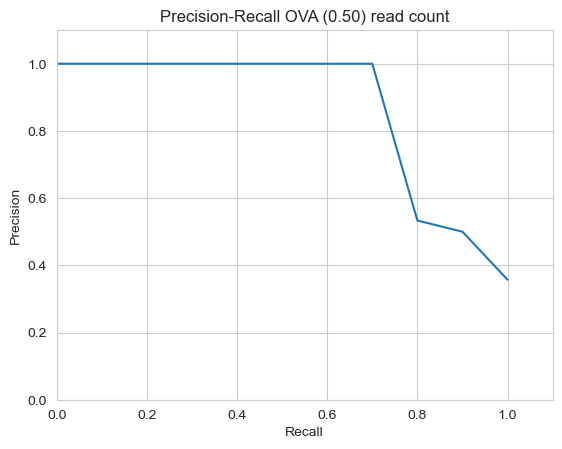

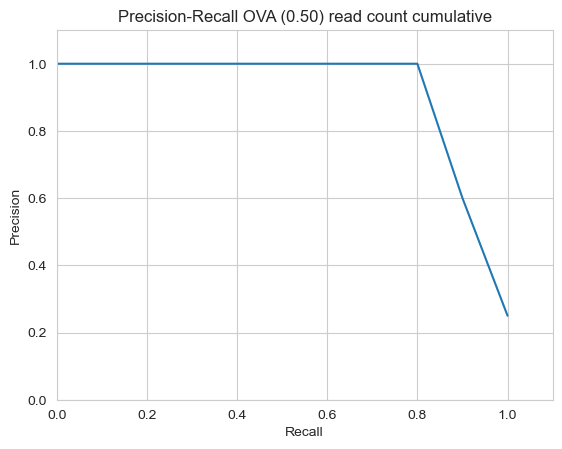

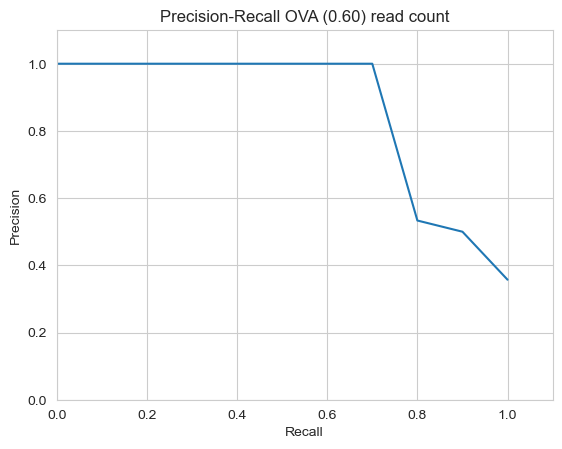

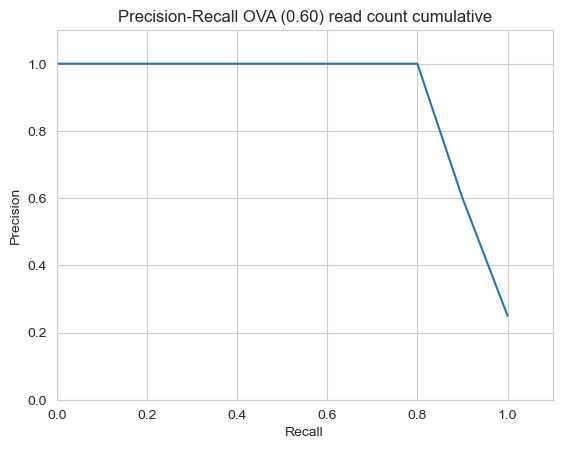

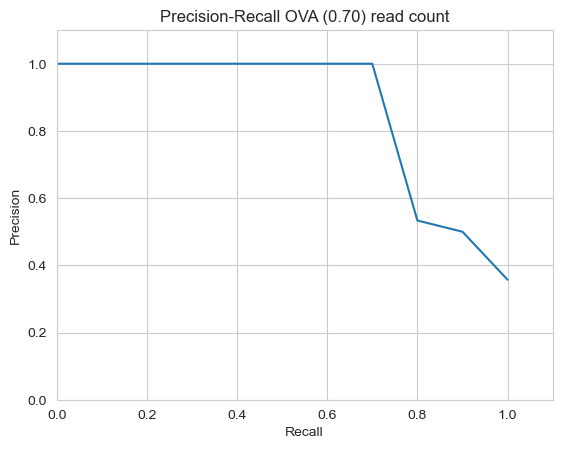

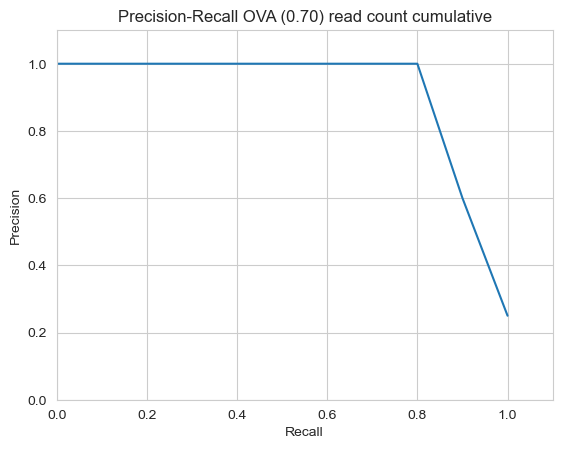

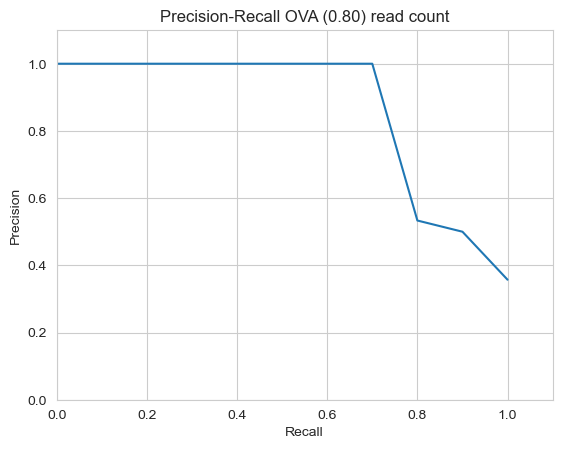

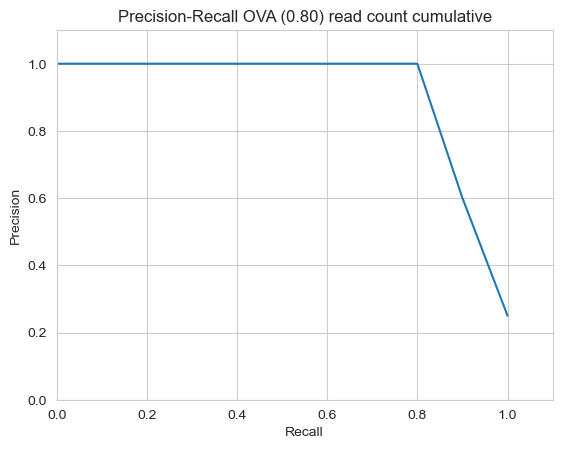

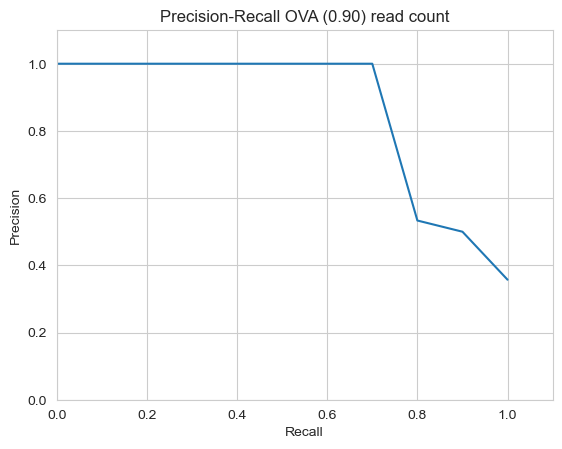

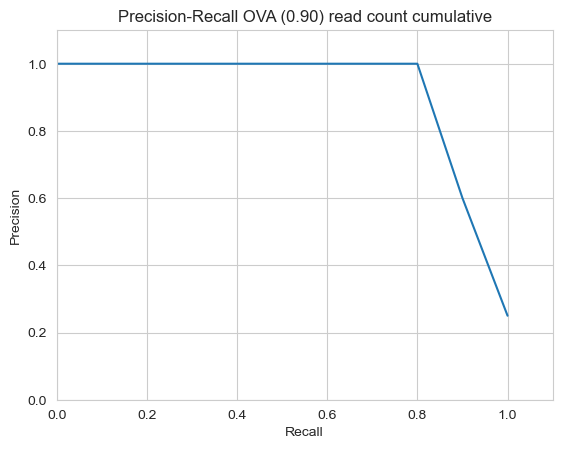

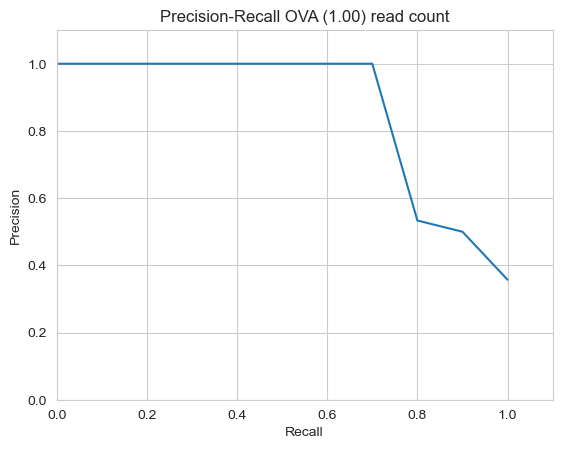

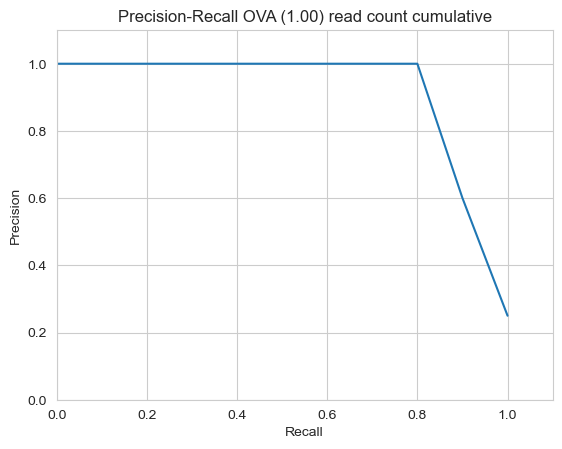

In [17]:
for column in pr_kraken["column"].unique():
    for rank in ["genus"]: # pr["rank"].unique()
        data = pr_kraken[(pr_kraken["column"] == column) & (pr_kraken["rank"] == rank)]
        plt.plot(data["recall"], data["precision"], label=rank)
    plt.xlim(0, 1.1)
    plt.xlabel("Recall")
    plt.ylim(0, 1.1)
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall {column}")
    plt.show()